# **Customer Segmentation Using Cluster Analysis (Clustering)**

---

*   *S/17/403 - Sumedha Kulasekara*
*   *S/17/404 - Lasantha Kulsooriya*



In [ ]:
!pip install datetimerange
!pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install -U kaleido
!pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install jovian opendatasets --upgrade --quiet

!pip install numpy pandas seaborn  --upgrade --quite

!pip install plotly --upgrade


Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no such option: --quite
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install datetimerange

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Importing Packages & Libraries**

In [ ]:
import numpy as np
import pandas as pd

import matplotlib
from matplotlib import pyplot as plt

from pydrive.auth import GoogleAuth
from google.colab import drive
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import plotly.figure_factory as ff
import plotly.io as pio
pio.templates
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import kaleido
import datetime
from datetimerange import DateTimeRange
import json
import os

from scipy import stats
from scipy.stats import chi2_contingency
from scipy.stats import pearsonr
from scipy.stats import norm
from scipy.stats import skew, norm, probplot, boxcox
from sklearn import preprocessing
import math

from sklearn.cluster import KMeans
#from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_samples, silhouette_score
#from yellowbrick.cluster import SilhouetteVisualizer

#import Orange
#from Orange.data import Domain, DiscreteVariable, ContinuousVariable
#from orangecontrib.associate.fpgrowth import*

In [ ]:
# import matplotlib.style as style

# style.use('seaborn-poster')
# style.use("fivethirtyeight")
# plt.rcParams['font.family'] = 'serif'
# sns.set(rc={'axes.facecolor':'black', 'figure.facecolor':'black', 'axes.grid' : True})



**Importing the Dataset**

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

file_id = '1OqCWXRuJ7Sm892kffrKllGXBjfIb2oA8' 

download = drive.CreateFile({'id': file_id})

# Download the file to a local disc
download.GetContentFile('Amazon Sales FY2020-21.csv')

#Import file
amazon_sales_df  = pd.read_csv("Amazon Sales FY2020-21.csv", low_memory = False)

#First 5 observations
amazon_sales_df.head()

,order_id,order_date,status,item_id,sku,qty_ordered,price,value,discount_amount,total,category,payment_method,bi_st,cust_id,year,month,ref_num,Name Prefix,First Name,Middle Initial,Last Name,Gender,age,full_name,E Mail,Sign in date,Phone No.,Place Name,County,City,State,Zip,Region,User Name,Discount_Percent
0,100354678,01/10/2020,received,574772,oasis_Oasis-064-36,21,89.9,1798.0,0.0,1798.0,Men's Fashion,cod,Valid,60124,2020,Oct-20,987867,Drs.,Jani,W,Titus,F,43,"Titus, Jani",jani.titus@gmail.com,8/22/2006,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0
1,100354678,01/10/2020,received,574774,Fantastic_FT-48,11,19.0,190.0,0.0,190.0,Men's Fashion,cod,Valid,60124,2020,Oct-20,987867,Drs.,Jani,W,Titus,F,43,"Titus, Jani",jani.titus@gmail.com,8/22/2006,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0
2,100354680,01/10/2020,complete,574777,mdeal_DMC-610-8,9,149.9,1199.2,0.0,1199.2,Men's Fashion,cod,Net,60124,2020,Oct-20,987867,Drs.,Jani,W,Titus,F,43,"Titus, Jani",jani.titus@gmail.com,8/22/2006,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0
3,100354680,01/10/2020,complete,574779,oasis_Oasis-061-36,9,79.9,639.2,0.0,639.2,Men's Fashion,cod,Net,60124,2020,Oct-20,987867,Drs.,Jani,W,Titus,F,43,"Titus, Jani",jani.titus@gmail.com,8/22/2006,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0
4,100367357,13/11/2020,received,595185,MEFNAR59C38B6CA08CD,2,99.9,99.9,0.0,99.9,Men's Fashion,cod,Valid,60124,2020,Nov-20,987867,Drs.,Jani,W,Titus,F,43,"Titus, Jani",jani.titus@gmail.com,8/22/2006,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0


**Changing the Column Names**

In [ ]:
column_names=['Order_Id', 'Order_Date', 'Status', 'Item_Id', 'SKU', 'Quantity_Ordered', 'Price', 'Value', 'Discount_Amount',
           'Total', 'Category', 'Payment_Method', 'By_St', 'Customer_Id', 'Year', 'Month',
           'Ref_Number', 'Name_Prefix', 'First_Name', 'Middle_Initial', 'Last_Name', 'Gender', 
           'Age', 'Full_Name', 'Email', 'Signed_Date', 'Phone_Number', 'Place_Name', 'County',
           'City', 'State', 'Zip_Code', 'Region', 'User_Name', 'Discount_Percent']
amazon_sales_df.columns = column_names;
pd.set_option('display.max_columns', None)
amazon_sales_df.head()

,Order_Id,Order_Date,Status,Item_Id,SKU,Quantity_Ordered,Price,Value,Discount_Amount,Total,Category,Payment_Method,By_St,Customer_Id,Year,Month,Ref_Number,Name_Prefix,First_Name,Middle_Initial,Last_Name,Gender,Age,Full_Name,Email,Signed_Date,Phone_Number,Place_Name,County,City,State,Zip_Code,Region,User_Name,Discount_Percent
0,100354678,01/10/2020,received,574772,oasis_Oasis-064-36,21,89.9,1798.0,0.0,1798.0,Men's Fashion,cod,Valid,60124,2020,Oct-20,987867,Drs.,Jani,W,Titus,F,43,"Titus, Jani",jani.titus@gmail.com,8/22/2006,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0
1,100354678,01/10/2020,received,574774,Fantastic_FT-48,11,19.0,190.0,0.0,190.0,Men's Fashion,cod,Valid,60124,2020,Oct-20,987867,Drs.,Jani,W,Titus,F,43,"Titus, Jani",jani.titus@gmail.com,8/22/2006,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0
2,100354680,01/10/2020,complete,574777,mdeal_DMC-610-8,9,149.9,1199.2,0.0,1199.2,Men's Fashion,cod,Net,60124,2020,Oct-20,987867,Drs.,Jani,W,Titus,F,43,"Titus, Jani",jani.titus@gmail.com,8/22/2006,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0
3,100354680,01/10/2020,complete,574779,oasis_Oasis-061-36,9,79.9,639.2,0.0,639.2,Men's Fashion,cod,Net,60124,2020,Oct-20,987867,Drs.,Jani,W,Titus,F,43,"Titus, Jani",jani.titus@gmail.com,8/22/2006,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0
4,100367357,13/11/2020,received,595185,MEFNAR59C38B6CA08CD,2,99.9,99.9,0.0,99.9,Men's Fashion,cod,Valid,60124,2020,Nov-20,987867,Drs.,Jani,W,Titus,F,43,"Titus, Jani",jani.titus@gmail.com,8/22/2006,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0


**Dimensions of the Dataset**

In [ ]:
amazon_sales_df.ndim

2

Dataset is 2 dimention. Which is a dataframe.

In [ ]:
amazon_sales_df.shape

(286392, 35)

Dataset contains 286392 observations in 35 variables.

**Structure of the Dataset**

In [ ]:
#Datatypes and null count
amazon_sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286392 entries, 0 to 286391
Data columns (total 35 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order_Id          286392 non-null  object 
 1   Order_Date        286392 non-null  object 
 2   Status            286392 non-null  object 
 3   Item_Id           286392 non-null  int64  
 4   SKU               286392 non-null  object 
 5   Quantity_Ordered  286392 non-null  int64  
 6   Price             286392 non-null  float64
 7   Value             286392 non-null  float64
 8   Discount_Amount   286392 non-null  float64
 9   Total             286392 non-null  float64
 10  Category          286392 non-null  object 
 11  Payment_Method    286392 non-null  object 
 12  By_St             286392 non-null  object 
 13  Customer_Id       286392 non-null  int64  
 14  Year              286392 non-null  int64  
 15  Month             286392 non-null  object 
 16  Ref_Number        28

In [ ]:
#Datatypes count
amazon_sales_df.dtypes.value_counts()

object     23
int64       7
float64     5
dtype: int64

Dataset contains 35 variables including 23 categorical variables and 12 numerical variables which contains 7 integer variables and 5 decimal variables.

**Null Values**

In [ ]:
amazon_sales_df.isna().sum()

Order_Id            0
Order_Date          0
Status              0
Item_Id             0
SKU                 0
Quantity_Ordered    0
Price               0
Value               0
Discount_Amount     0
Total               0
Category            0
Payment_Method      0
By_St               0
Customer_Id         0
Year                0
Month               0
Ref_Number          0
Name_Prefix         0
First_Name          0
Middle_Initial      0
Last_Name           0
Gender              0
Age                 0
Full_Name           0
Email               0
Signed_Date         0
Phone_Number        0
Place_Name          0
County              0
City                0
State               0
Zip_Code            0
Region              0
User_Name           0
Discount_Percent    0
dtype: int64

There are no null values.

**Duplicate Values**

In [ ]:
amazon_sales_df.duplicated().sum()

0

There are no duplicated values in this dataset.

**Unique Values**

In [ ]:
amazon_sales_df.nunique()

Order_Id            201716
Order_Date             365
Status                  13
Item_Id             286392
SKU                  47932
Quantity_Ordered        72
Price                 7561
Value                10607
Discount_Amount      13732
Total                23755
Category                15
Payment_Method          13
By_St                    3
Customer_Id          64248
Year                     2
Month                   12
Ref_Number           62065
Name_Prefix              7
First_Name            5161
Middle_Initial          26
Last_Name            18208
Gender                   2
Age                     58
Full_Name            64212
Email                64246
Signed_Date          11647
Phone_Number         64248
Place_Name           15892
County                2551
City                 15892
State                   51
Zip_Code             33773
Region                   4
User_Name            64006
Discount_Percent     17009
dtype: int64

### **Data Preprocessing**



---



**Analyzing Discounts and Total Value**





In [ ]:
#Making new dataframe with selected columns
new_df = amazon_sales_df[['Order_Id', 'Quantity_Ordered', 'Price', 'Value', 'Discount_Amount', 'Total']]
pd.set_option('mode.chained_assignment', None)
new_df['New_Value']=new_df['Quantity_Ordered']*new_df["Price"]
new_df['New_Total'] = new_df['New_Value'] - new_df['Discount_Amount']
new_df.head(10)

,Order_Id,Quantity_Ordered,Price,Value,Discount_Amount,Total,New_Value,New_Total
0,100354678,21,89.9,1798.0,0.0,1798.0,1887.9,1887.9
1,100354678,11,19.0,190.0,0.0,190.0,209.0,209.0
2,100354680,9,149.9,1199.2,0.0,1199.2,1349.1,1349.1
3,100354680,9,79.9,639.2,0.0,639.2,719.1,719.1
4,100367357,2,99.9,99.9,0.0,99.9,199.8,199.8
5,100367357,2,39.9,39.9,0.0,39.9,79.8,79.8
6,100367360,2,47.6,47.6,0.0,47.6,95.2,95.2
7,100354677,2,49.0,49.0,0.0,49.0,98.0,98.0
8,100354677,2,135.0,135.0,0.0,135.0,270.0,270.0
9,100354677,2,549.9,549.9,0.0,549.9,1099.8,1099.8


In [ ]:
#Marking discounted values
new_df['Is_Discounted'] = np.where(new_df['Discount_Amount'] > 0 , True, False)
new_df.head(10)

,Order_Id,Quantity_Ordered,Price,Value,Discount_Amount,Total,New_Value,New_Total,Is_Discounted
0,100354678,21,89.9,1798.0,0.0,1798.0,1887.9,1887.9,False
1,100354678,11,19.0,190.0,0.0,190.0,209.0,209.0,False
2,100354680,9,149.9,1199.2,0.0,1199.2,1349.1,1349.1,False
3,100354680,9,79.9,639.2,0.0,639.2,719.1,719.1,False
4,100367357,2,99.9,99.9,0.0,99.9,199.8,199.8,False
5,100367357,2,39.9,39.9,0.0,39.9,79.8,79.8,False
6,100367360,2,47.6,47.6,0.0,47.6,95.2,95.2,False
7,100354677,2,49.0,49.0,0.0,49.0,98.0,98.0,False
8,100354677,2,135.0,135.0,0.0,135.0,270.0,270.0,False
9,100354677,2,549.9,549.9,0.0,549.9,1099.8,1099.8,False


In [ ]:
#Marking wrong total values
new_df['Is_Correct_Total'] = np.where((new_df['Total'] == new_df['New_Total'] ), True, False)
new_df.head(10)

,Order_Id,Quantity_Ordered,Price,Value,Discount_Amount,Total,New_Value,New_Total,Is_Discounted,Is_Correct_Total
0,100354678,21,89.9,1798.0,0.0,1798.0,1887.9,1887.9,False,False
1,100354678,11,19.0,190.0,0.0,190.0,209.0,209.0,False,False
2,100354680,9,149.9,1199.2,0.0,1199.2,1349.1,1349.1,False,False
3,100354680,9,79.9,639.2,0.0,639.2,719.1,719.1,False,False
4,100367357,2,99.9,99.9,0.0,99.9,199.8,199.8,False,False
5,100367357,2,39.9,39.9,0.0,39.9,79.8,79.8,False,False
6,100367360,2,47.6,47.6,0.0,47.6,95.2,95.2,False,False
7,100354677,2,49.0,49.0,0.0,49.0,98.0,98.0,False,False
8,100354677,2,135.0,135.0,0.0,135.0,270.0,270.0,False,False
9,100354677,2,549.9,549.9,0.0,549.9,1099.8,1099.8,False,False


**Cross Table For Dicounts and Total**

In [ ]:
crosstab1 =pd.crosstab(new_df['Is_Discounted'], new_df['Is_Correct_Total'], margins = True)
print(crosstab1)

Is_Correct_Total   False  True     All
Is_Discounted                         
False             199084  1574  200658
True               85734     0   85734
All               284818  1574  286392


In [ ]:
crosstab2 =pd.crosstab(new_df['Is_Discounted'], new_df['Is_Correct_Total'], margins = True ,normalize = True).style.format('{:.2%}')
crosstab2

Is_Correct_Total,False,True,All
Is_Discounted,,,
False,69.51%,0.55%,70.06%
True,29.94%,0.00%,29.94%
All,99.45%,0.55%,100.00%


The two cross tables show that 85,734 customers, or 29.94% of all customers, received discounts. 200,658 customers  didn't get any discount, which is 70.06% from the total customers. And all the discounted customers have a wrong total. And from non-discounted customers, 69.51% customers total is wrong.

99.94% of values in Total column is wrong.

In [ ]:
new_df2 = new_df
new_df2['Total'] = np.where(new_df['Is_Correct_Total'] != True, new_df['New_Total'], new_df['Total'] )
new_df2['Is_Correct_Total'] = np.where((new_df2['Total'] == new_df2['New_Total'] ), True, False)
crosstab3 =pd.crosstab(new_df2['Is_Discounted'], new_df['Is_Correct_Total'], margins = True)
print(crosstab3)

Is_Correct_Total    True     All
Is_Discounted                   
False             200658  200658
True               85734   85734
All               286392  286392


In [ ]:
#Updating Correct Total values and 
amazon_sales_df['Total'] = new_df['Total']
amazon_sales_df['Value'] =  new_df['New_Value']
amazon_sales_df.head()

,Order_Id,Order_Date,Status,Item_Id,SKU,Quantity_Ordered,Price,Value,Discount_Amount,Total,Category,Payment_Method,By_St,Customer_Id,Year,Month,Ref_Number,Name_Prefix,First_Name,Middle_Initial,Last_Name,Gender,Age,Full_Name,Email,Signed_Date,Phone_Number,Place_Name,County,City,State,Zip_Code,Region,User_Name,Discount_Percent
0,100354678,01/10/2020,received,574772,oasis_Oasis-064-36,21,89.9,1887.9,0.0,1887.9,Men's Fashion,cod,Valid,60124,2020,Oct-20,987867,Drs.,Jani,W,Titus,F,43,"Titus, Jani",jani.titus@gmail.com,8/22/2006,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0
1,100354678,01/10/2020,received,574774,Fantastic_FT-48,11,19.0,209.0,0.0,209.0,Men's Fashion,cod,Valid,60124,2020,Oct-20,987867,Drs.,Jani,W,Titus,F,43,"Titus, Jani",jani.titus@gmail.com,8/22/2006,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0
2,100354680,01/10/2020,complete,574777,mdeal_DMC-610-8,9,149.9,1349.1,0.0,1349.1,Men's Fashion,cod,Net,60124,2020,Oct-20,987867,Drs.,Jani,W,Titus,F,43,"Titus, Jani",jani.titus@gmail.com,8/22/2006,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0
3,100354680,01/10/2020,complete,574779,oasis_Oasis-061-36,9,79.9,719.1,0.0,719.1,Men's Fashion,cod,Net,60124,2020,Oct-20,987867,Drs.,Jani,W,Titus,F,43,"Titus, Jani",jani.titus@gmail.com,8/22/2006,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0
4,100367357,13/11/2020,received,595185,MEFNAR59C38B6CA08CD,2,99.9,199.8,0.0,199.8,Men's Fashion,cod,Valid,60124,2020,Nov-20,987867,Drs.,Jani,W,Titus,F,43,"Titus, Jani",jani.titus@gmail.com,8/22/2006,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0


In [ ]:
amazon_sales_df[amazon_sales_df['Discount_Amount']>0].head()

,Order_Id,Order_Date,Status,Item_Id,SKU,Quantity_Ordered,Price,Value,Discount_Amount,Total,Category,Payment_Method,By_St,Customer_Id,Year,Month,Ref_Number,Name_Prefix,First_Name,Middle_Initial,Last_Name,Gender,Age,Full_Name,Email,Signed_Date,Phone_Number,Place_Name,County,City,State,Zip_Code,Region,User_Name,Discount_Percent
12,100403034,24/12/2020,canceled,656937,APPWES59CA4D59CB41A,2,254.8,509.6,39.80628,469.79372,Appliances,Easypay,Gross,42485,2020,Dec-20,171143,Prof.,Lee,S,Eaker,M,28,"Eaker, Lee",lee.eaker@gmail.com,02/04/1981,239-335-6755,Graham,Bradford,Graham,FL,32042,South,lseaker,15.622559
13,100403034,24/12/2020,canceled,656938,APPPHI5A09939191938,2,315.5,631.0,49.28917,581.71083,Appliances,Easypay,Gross,42485,2020,Dec-20,171143,Prof.,Lee,S,Eaker,M,28,"Eaker, Lee",lee.eaker@gmail.com,02/04/1981,239-335-6755,Graham,Bradford,Graham,FL,32042,South,lseaker,15.622558
14,100403034,24/12/2020,canceled,656939,HALSHO59F836EF959B9,2,69.8,139.6,10.90455,128.69545,Home & Living,Easypay,Gross,42485,2020,Dec-20,171143,Prof.,Lee,S,Eaker,M,28,"Eaker, Lee",lee.eaker@gmail.com,02/04/1981,239-335-6755,Graham,Bradford,Graham,FL,32042,South,lseaker,15.622564
15,100403077,24/12/2020,canceled,657023,APPWES59CA4D59CB41A,2,254.8,509.6,39.80628,469.79372,Appliances,Easypay,Gross,42485,2020,Dec-20,171143,Prof.,Lee,S,Eaker,M,28,"Eaker, Lee",lee.eaker@gmail.com,02/04/1981,239-335-6755,Graham,Bradford,Graham,FL,32042,South,lseaker,15.622559
16,100403077,24/12/2020,canceled,657024,APPPHI5A09939191938,2,315.5,631.0,49.28917,581.71083,Appliances,Easypay,Gross,42485,2020,Dec-20,171143,Prof.,Lee,S,Eaker,M,28,"Eaker, Lee",lee.eaker@gmail.com,02/04/1981,239-335-6755,Graham,Bradford,Graham,FL,32042,South,lseaker,15.622558


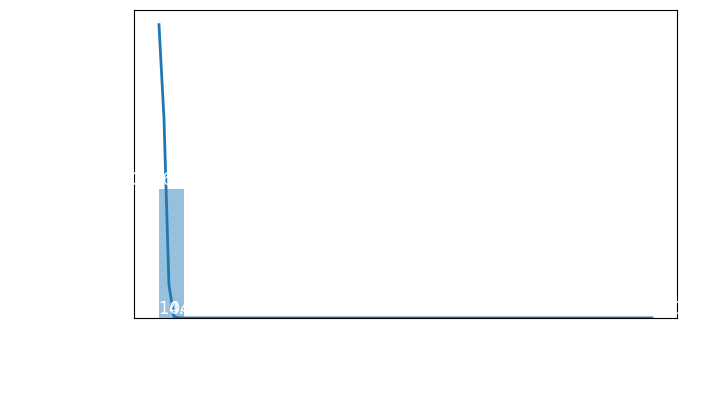

In [ ]:
mu, sigma = stats.norm.fit(amazon_sales_df['Discount_Amount'])

x_hat = np.linspace(min(amazon_sales_df['Discount_Amount']), max(amazon_sales_df['Discount_Amount']), num=100)
y_hat = stats.norm.pdf(x_hat, mu, sigma)

fig, ax = plt.subplots(figsize=(7,4))
ax.plot(x_hat, y_hat, linewidth=2, label='normal')
ax.hist(x=amazon_sales_df['Discount_Amount'], density=True, bins=20, color="#3182bd", alpha=0.5)
ax.bar_label(container = ax.containers[0], padding = 0, fontsize = 12, color='white')
plt.xticks( fontsize=10)
plt.yticks( fontsize=10)
plt.xlabel('Order Status', fontsize=24, labelpad=24, color='white')
plt.ylabel('Counts', fontsize=24, labelpad=24, color='white');
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white');

**Order Date & Signed Date**

In [ ]:
#Converting 'Order Date' in to datetime type
amazon_sales_df["Order_Date"] = pd.to_datetime(amazon_sales_df["Order_Date"])
print (amazon_sales_df["Order_Date"].dtypes)

datetime64[ns]


In [ ]:
#coverting 'Signed_Date' to datetime type
amazon_sales_df["Signed_Date"] = pd.to_datetime(amazon_sales_df["Signed_Date"])
print (amazon_sales_df["Signed_Date"].dtypes)

datetime64[ns]


**Check Time Period**

In [ ]:
df3 = amazon_sales_df
#Order Date
Order_date_range = DateTimeRange(df3['Order_Date'].dt.date.min(), df3['Order_Date'].dt.date.max())
"Order dates are from "+ str(Order_date_range)[0:10] +" to "+ str(Order_date_range)[22:32]

'Order dates are from 2020-01-10 to 2021-12-09'

In [ ]:
Order_date_range = DateTimeRange(df3['Signed_Date'].dt.date.min(), df3['Signed_Date'].dt.date.max())
"Signed dates are from "+ str(Order_date_range)[0:10] +" to "+ str(Order_date_range)[22:32]

'Signed dates are from 1978-11-04 to 2017-07-28'

Signed Dates cannot contain dates before 1994 . Because Amazon is founded in 1994 -07-05

In [ ]:
d=len(df3[df3['Signed_Date'] <= '1994-07-05' ])
c = (d/len(df3))*100
print(d,c)

28782 10.049861727981229


There are 28782 dates before 1994-07-05. Which is 10.05% of the total observations.

In [ ]:
amazon_sales_df['Is_Discount']=amazon_sales_df.Discount_Amount>0

In [ ]:
amazon_sales_df.head()

,Order_Id,Order_Date,Status,Item_Id,SKU,Quantity_Ordered,Price,Value,Discount_Amount,Total,Category,Payment_Method,By_St,Customer_Id,Year,Month,Ref_Number,Name_Prefix,First_Name,Middle_Initial,Last_Name,Gender,Age,Full_Name,Email,Signed_Date,Phone_Number,Place_Name,County,City,State,Zip_Code,Region,User_Name,Discount_Percent,Is_Discount
0,100354678,2020-01-10,received,574772,oasis_Oasis-064-36,21,89.9,1887.9,0.0,1887.9,Men's Fashion,cod,Valid,60124,2020,Oct-20,987867,Drs.,Jani,W,Titus,F,43,"Titus, Jani",jani.titus@gmail.com,2006-08-22,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0,False
1,100354678,2020-01-10,received,574774,Fantastic_FT-48,11,19.0,209.0,0.0,209.0,Men's Fashion,cod,Valid,60124,2020,Oct-20,987867,Drs.,Jani,W,Titus,F,43,"Titus, Jani",jani.titus@gmail.com,2006-08-22,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0,False
2,100354680,2020-01-10,complete,574777,mdeal_DMC-610-8,9,149.9,1349.1,0.0,1349.1,Men's Fashion,cod,Net,60124,2020,Oct-20,987867,Drs.,Jani,W,Titus,F,43,"Titus, Jani",jani.titus@gmail.com,2006-08-22,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0,False
3,100354680,2020-01-10,complete,574779,oasis_Oasis-061-36,9,79.9,719.1,0.0,719.1,Men's Fashion,cod,Net,60124,2020,Oct-20,987867,Drs.,Jani,W,Titus,F,43,"Titus, Jani",jani.titus@gmail.com,2006-08-22,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0,False
4,100367357,2020-11-13,received,595185,MEFNAR59C38B6CA08CD,2,99.9,199.8,0.0,199.8,Men's Fashion,cod,Valid,60124,2020,Nov-20,987867,Drs.,Jani,W,Titus,F,43,"Titus, Jani",jani.titus@gmail.com,2006-08-22,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0,False


In [ ]:
df_completed = amazon_sales_df[amazon_sales_df['Status']=='complete']
df_completed.head()

,Order_Id,Order_Date,Status,Item_Id,SKU,Quantity_Ordered,Price,Value,Discount_Amount,Total,Category,Payment_Method,By_St,Customer_Id,Year,Month,Ref_Number,Name_Prefix,First_Name,Middle_Initial,Last_Name,Gender,Age,Full_Name,Email,Signed_Date,Phone_Number,Place_Name,County,City,State,Zip_Code,Region,User_Name,Discount_Percent,Is_Discount
2,100354680,2020-01-10,complete,574777,mdeal_DMC-610-8,9,149.9,1349.1,0.00,1349.10,Men's Fashion,cod,Net,60124,2020,Oct-20,987867,Drs.,Jani,W,Titus,F,43,"Titus, Jani",jani.titus@gmail.com,2006-08-22,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0,False
3,100354680,2020-01-10,complete,574779,oasis_Oasis-061-36,9,79.9,719.1,0.00,719.10,Men's Fashion,cod,Net,60124,2020,Oct-20,987867,Drs.,Jani,W,Titus,F,43,"Titus, Jani",jani.titus@gmail.com,2006-08-22,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0,False
24,100403536,2020-12-24,complete,657777,APPWES59CA4D59CB41A,3,254.8,764.4,101.92,662.48,Appliances,Easypay,Net,42485,2020,Dec-20,171143,Prof.,Lee,S,Eaker,M,28,"Eaker, Lee",lee.eaker@gmail.com,1981-02-04,239-335-6755,Graham,Bradford,Graham,FL,32042,South,lseaker,20.0,True
25,100403536,2020-12-24,complete,657778,APPPHI5A09939191938,3,315.5,946.5,126.20,820.30,Appliances,Easypay,Net,42485,2020,Dec-20,171143,Prof.,Lee,S,Eaker,M,28,"Eaker, Lee",lee.eaker@gmail.com,1981-02-04,239-335-6755,Graham,Bradford,Graham,FL,32042,South,lseaker,20.0,True
26,100403536,2020-12-24,complete,657779,HALSHO59F836EF959B9,3,69.8,209.4,27.92,181.48,Home & Living,Easypay,Net,42485,2020,Dec-20,171143,Prof.,Lee,S,Eaker,M,28,"Eaker, Lee",lee.eaker@gmail.com,1981-02-04,239-335-6755,Graham,Bradford,Graham,FL,32042,South,lseaker,20.0,True


# **KMODE CLUSTERING**

In [ ]:
amazon_sales_df.info()

In [ ]:
print(pd.DataFrame(amazon_sales_df.info()))

In [ ]:
amazon_sales_df.columns

In [ ]:
cat_df=df_completed[["Status","Category","Payment_Method","By_St","Gender","State",'Place_Name', 'County',"Is_Discount","City","User_Name","Region","Month","Age"]]
cat_df.head()

In [ ]:
# Data pre-processing

cat_df.drop(["Status","Place_Name","County","Month","City","User_Name"], axis = 1, inplace = True)
# Show the data after pre-processing
print('Dimension data: {} rows and {} columns'.format(len(cat_df), len(cat_df.columns)))
cat_df.head()

In [ ]:
cat_df.nunique()

In [ ]:
print(cat_df['Age'].max())

In [ ]:
cat_df['age_bin'] = pd.cut(cat_df['Age'], [0, 12, 19, 30, 45, 70, 100], 
                              labels=['0-12', '12-19', '19-30', '30-45','45-70','70-100'])
cat_df  = cat_df.drop('Age',axis = 1)
cat_df.head()

In [ ]:
cat_df.shape

In [ ]:
cat_df.describe()

In [ ]:
cat_df.info()

In [ ]:
cat_df.isnull().sum()*100/cat_df.shape[0]

**Model Building**

In [ ]:
# First we will keep a copy of data
cat_df_copy = cat_df.copy()

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
cat_df = cat_df.apply(le.fit_transform)
cat_df.head()

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
cat_df = cat_df.apply(le.fit_transform)
cat_df.head()

In [ ]:
pip install kmodes

In [ ]:
# supress warnings
import warnings
warnings.filterwarnings('ignore')

# Importing all required packages
import numpy as np
import pandas as pd

# Data viz lib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.pyplot import xticks
from kmodes.kmodes import KModes

km_cao = KModes(n_clusters=2, init = "Cao", n_init = 1, verbose=1)
fitClusters_cao = km_cao.fit_predict(cat_df)

In [ ]:
# Predicted Clusters
fitClusters_cao

In [ ]:
clusterCentroidsDf = pd.DataFrame(km_cao.cluster_centroids_)
clusterCentroidsDf.columns = cat_df.columns

In [ ]:
# Mode of the clusters
clusterCentroidsDf

In [ ]:
km_huang = KModes(n_clusters=2, init = "Huang", n_init = 1, verbose=1)
fitClusters_huang = km_huang.fit_predict(cat_df)

In [ ]:
# Predicted clusters
fitClusters_huang

**Choosing K by comparing Cost against each K**

In [ ]:
# cost = []
# for num_clusters in list(range(1,20)):
#     kmode = KModes(n_clusters=num_clusters, init = "Cao", n_init = 1, verbose=1)
#     kmode.fit_predict(cat_df)
#     cost.append(kmode.cost_)

In [ ]:
# y = np.array([i for i in range(1,20,1)])
# plt.figure(figsize=(15,8))
# plt.plot(y,cost)

To determine the optimal number of clusters, the Elbow method is used but it is modified to use within-cluster difference. From the results of plotting within-cluster differences for various values, the principle of the Elbow method takes the value of k at the point when the value does not decrease significantly with the addition of the value of k.

In [ ]:
## Choosing K=10
km_cao = KModes(n_clusters=10, init = "Cao", n_init = 1, verbose=1)
fitClusters_cao = km_cao.fit_predict(cat_df)

In [ ]:
fitClusters_cao

**Combining the predicted clusters with the original DF.**

In [ ]:
cat_df = cat_df_copy.reset_index()

In [ ]:
clustersDf = pd.DataFrame(fitClusters_cao)
clustersDf.columns = ['cluster_predicted']
combinedDf = pd.concat([cat_df, clustersDf], axis = 1).reset_index()
combinedDf = combinedDf.drop(['index', 'level_0'], axis = 1)

combinedDf.head()

In [ ]:
cluster_0 = combinedDf[combinedDf['cluster_predicted'] == 0]
cluster_1 = combinedDf[combinedDf['cluster_predicted'] == 1]
cluster_2 = combinedDf[combinedDf['cluster_predicted'] == 2]
cluster_3 = combinedDf[combinedDf['cluster_predicted'] == 3]
cluster_4 = combinedDf[combinedDf['cluster_predicted'] == 4]
cluster_5 = combinedDf[combinedDf['cluster_predicted'] == 5]
cluster_6 = combinedDf[combinedDf['cluster_predicted'] == 6]
cluster_7 = combinedDf[combinedDf['cluster_predicted'] == 7]
cluster_8 = combinedDf[combinedDf['cluster_predicted'] == 8]
cluster_9 = combinedDf[combinedDf['cluster_predicted'] == 9]

In [ ]:
cluster_0.info()

In [ ]:
cluster_1.info()

In [ ]:
#category
#category
import colorcet as cc
plt.figure(figsize = (12,8))
custom_palette = sns.color_palette(cc.glasbey, n_colors=25)
sns.countplot(x=combinedDf['cluster_predicted'],hue=combinedDf['Category'],palette=custom_palette)
plt.xticks(fontsize=15)
plt.show()

In [ ]:
#Is_Discounted
plt.subplots(figsize = (12,6))
sns.countplot(x=combinedDf['cluster_predicted'],hue=combinedDf['Is_Discount'])
plt.show()

In [ ]:
#age_bin
plt.subplots(figsize = (12,6))
sns.countplot(x=combinedDf['cluster_predicted'],hue=combinedDf['age_bin'])
plt.show()

In [ ]:
#Region
plt.subplots(figsize = (12,6))
sns.countplot(x=combinedDf['cluster_predicted'],hue=combinedDf['Region'])
plt.show()

In [ ]:
#Gender
plt.subplots(figsize = (12,6))
sns.countplot(x=combinedDf['cluster_predicted'],hue=combinedDf['Gender'])
plt.show()

In [ ]:
combinedDf.groupby(['cluster_predicted']).size()

In [ ]:
#Is_Discounted
plt.subplots(figsize = (12,6))
sns.countplot(x=combinedDf['cluster_predicted'])
plt.show()

In [ ]:
df_kmode_cluster1 = combinedDf[combinedDf['cluster_predicted']==0]
df_kmode_cluster1.head()


In [ ]:
combinedDf.groupby('cluster_predicted').agg({
    'age_bin' : ['count'],
    'Gender' : ['count']
})

In [ ]:
df_kmode_cluster1.tail()

In [ ]:
df_kmode_cluster1.info

In [ ]:
cluster_1.groupby("Region").count()

In [ ]:
cluster_6.groupby("Region").count()

In [ ]:
cluster_3.groupby("Region").count()

# **K Mean**

# **Data Preparation For Clustering using RFM Values**
We are going to analysis the Customers based on below 3 factors:
1.  R (Recency): Number of days since last purchase 
2.  F (Frequency): Number of tracsactions
3. M (Monetary): Total Monetory of transactions (revenue contributed)

In [ ]:
df_completed = amazon_sales_df[amazon_sales_df['Status']=='complete']
df_completed.head()

,Order_Id,Order_Date,Status,Item_Id,SKU,Quantity_Ordered,Price,Value,Discount_Amount,Total,Category,Payment_Method,By_St,Customer_Id,Year,Month,Ref_Number,Name_Prefix,First_Name,Middle_Initial,Last_Name,Gender,Age,Full_Name,Email,Signed_Date,Phone_Number,Place_Name,County,City,State,Zip_Code,Region,User_Name,Discount_Percent,Is_Discount
2,100354680,2020-01-10,complete,574777,mdeal_DMC-610-8,9,149.9,1349.1,0.00,1349.10,Men's Fashion,cod,Net,60124,2020,Oct-20,987867,Drs.,Jani,W,Titus,F,43,"Titus, Jani",jani.titus@gmail.com,2006-08-22,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0,False
3,100354680,2020-01-10,complete,574779,oasis_Oasis-061-36,9,79.9,719.1,0.00,719.10,Men's Fashion,cod,Net,60124,2020,Oct-20,987867,Drs.,Jani,W,Titus,F,43,"Titus, Jani",jani.titus@gmail.com,2006-08-22,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0,False
24,100403536,2020-12-24,complete,657777,APPWES59CA4D59CB41A,3,254.8,764.4,101.92,662.48,Appliances,Easypay,Net,42485,2020,Dec-20,171143,Prof.,Lee,S,Eaker,M,28,"Eaker, Lee",lee.eaker@gmail.com,1981-02-04,239-335-6755,Graham,Bradford,Graham,FL,32042,South,lseaker,20.0,True
25,100403536,2020-12-24,complete,657778,APPPHI5A09939191938,3,315.5,946.5,126.20,820.30,Appliances,Easypay,Net,42485,2020,Dec-20,171143,Prof.,Lee,S,Eaker,M,28,"Eaker, Lee",lee.eaker@gmail.com,1981-02-04,239-335-6755,Graham,Bradford,Graham,FL,32042,South,lseaker,20.0,True
26,100403536,2020-12-24,complete,657779,HALSHO59F836EF959B9,3,69.8,209.4,27.92,181.48,Home & Living,Easypay,Net,42485,2020,Dec-20,171143,Prof.,Lee,S,Eaker,M,28,"Eaker, Lee",lee.eaker@gmail.com,1981-02-04,239-335-6755,Graham,Bradford,Graham,FL,32042,South,lseaker,20.0,True


In [ ]:
# Droping rows having missing values

df = df_completed.dropna()
df.shape

(88968, 36)

In [ ]:
# New Attribute : Monetary

rfm_m = df.groupby('Customer_Id')['Total'].sum()
rfm_m = rfm_m.reset_index()
rfm_m.head()

,Customer_Id,Total
0,4,54342.65
1,15,415.10
2,20,47222.40
3,21,126.00
4,28,104.00


In [ ]:
# New Attribute : Frequency

rfm_f = df.groupby('Customer_Id')['Ref_Number'].count()

rfm_f = rfm_f.reset_index()
rfm_f.columns = ['Customer_Id', 'Frequency']
rfm_f.head(20)

,Customer_Id,Frequency
0,4,22
1,15,6
2,20,5
3,21,1
4,28,1
5,32,82
6,33,72
7,41,1
8,44,2
9,47,12


In [ ]:
# Merging the two dfs

rfm = pd.merge(rfm_m, rfm_f, on='Customer_Id', how='inner')
rfm.head()

,Customer_Id,Total,Frequency
0,4,54342.65,22
1,15,415.10,6
2,20,47222.40,5
3,21,126.00,1
4,28,104.00,1


In [ ]:
# Compute the maximum date to know the last transaction date

max_date = max(df['Order_Date'])
max_date

Timestamp('2021-12-08 00:00:00')

In [ ]:
# Compute the difference between max date and transaction date

df['Diff'] = max_date - df['Order_Date']
df.head()

,Order_Id,Order_Date,Status,Item_Id,SKU,Quantity_Ordered,Price,Value,Discount_Amount,Total,Category,Payment_Method,By_St,Customer_Id,Year,Month,Ref_Number,Name_Prefix,First_Name,Middle_Initial,Last_Name,Gender,Age,Full_Name,Email,Signed_Date,Phone_Number,Place_Name,County,City,State,Zip_Code,Region,User_Name,Discount_Percent,Is_Discount,Diff
2,100354680,2020-01-10,complete,574777,mdeal_DMC-610-8,9,149.9,1349.1,0.00,1349.10,Men's Fashion,cod,Net,60124,2020,Oct-20,987867,Drs.,Jani,W,Titus,F,43,"Titus, Jani",jani.titus@gmail.com,2006-08-22,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0,False,698 days
3,100354680,2020-01-10,complete,574779,oasis_Oasis-061-36,9,79.9,719.1,0.00,719.10,Men's Fashion,cod,Net,60124,2020,Oct-20,987867,Drs.,Jani,W,Titus,F,43,"Titus, Jani",jani.titus@gmail.com,2006-08-22,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0,False,698 days
24,100403536,2020-12-24,complete,657777,APPWES59CA4D59CB41A,3,254.8,764.4,101.92,662.48,Appliances,Easypay,Net,42485,2020,Dec-20,171143,Prof.,Lee,S,Eaker,M,28,"Eaker, Lee",lee.eaker@gmail.com,1981-02-04,239-335-6755,Graham,Bradford,Graham,FL,32042,South,lseaker,20.0,True,349 days
25,100403536,2020-12-24,complete,657778,APPPHI5A09939191938,3,315.5,946.5,126.20,820.30,Appliances,Easypay,Net,42485,2020,Dec-20,171143,Prof.,Lee,S,Eaker,M,28,"Eaker, Lee",lee.eaker@gmail.com,1981-02-04,239-335-6755,Graham,Bradford,Graham,FL,32042,South,lseaker,20.0,True,349 days
26,100403536,2020-12-24,complete,657779,HALSHO59F836EF959B9,3,69.8,209.4,27.92,181.48,Home & Living,Easypay,Net,42485,2020,Dec-20,171143,Prof.,Lee,S,Eaker,M,28,"Eaker, Lee",lee.eaker@gmail.com,1981-02-04,239-335-6755,Graham,Bradford,Graham,FL,32042,South,lseaker,20.0,True,349 days


In [ ]:
# Compute last transaction date to get the recency of customers

rfm_p = df.groupby('Customer_Id')['Diff'].min()

rfm_p = rfm_p.reset_index()
rfm_p.head()

,Customer_Id,Diff
0,4,85 days
1,15,36 days
2,20,263 days
3,21,281 days
4,28,417 days


In [ ]:
# Extract number of days only

rfm_p['Diff'] = rfm_p['Diff'].dt.days
rfm_p.head()

,Customer_Id,Diff
0,4,85
1,15,36
2,20,263
3,21,281
4,28,417


In [ ]:
# Merge tha dataframes to get the final RFM dataframe

rfm = pd.merge(rfm, rfm_p, on='Customer_Id', how='inner')
rfm_WO=pd.merge(rfm, rfm_p, on='Customer_Id', how='inner')
rfm.columns = ['Customer_Id', 'Monetory', 'Frequency', 'Recency']
rfm.head()

,Customer_Id,Monetory,Frequency,Recency
0,4,54342.65,22,85
1,15,415.10,6,36
2,20,47222.40,5,263
3,21,126.00,1,281
4,28,104.00,1,417


Text(0.5, 0, 'Attributes')

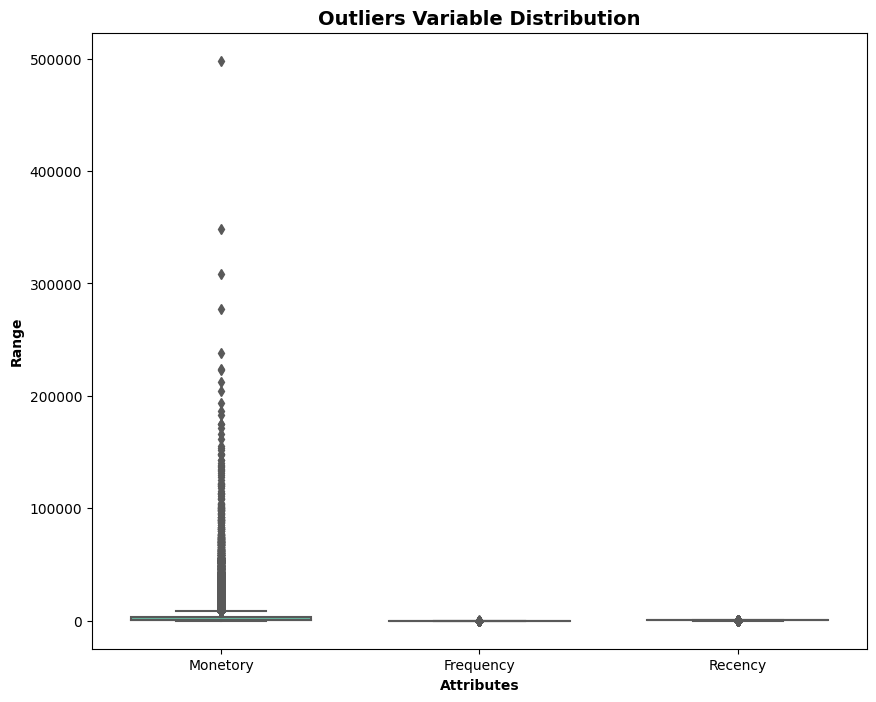

In [ ]:
# Outlier Analysis of Monetory Frequency and Recency

attributes = ['Monetory','Frequency','Recency']
plt.rcParams['figure.figsize'] = [10,8]
sns.boxplot(data = rfm[attributes], orient="v", palette="Set2" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Attributes", fontweight = 'bold')

In [ ]:
# Removing (statistical) outliers for Monetory
P1 = rfm.Monetory.quantile(0.05)
P2 = rfm.Monetory.quantile(0.95)
P_Range = P2 - P1
rfm = rfm[(rfm.Monetory >= P1 - 1.5*P_Range) & (rfm.Monetory <= P2 + 1.5*P_Range)]

# Removing (statistical) outliers for Recency
P1 = rfm.Recency.quantile(0.05)
P2 = rfm.Recency.quantile(0.95)
P_Range = P2 - P1
rfm = rfm[(rfm.Recency >= P1 - 1.5*P_Range) & (rfm.Recency <= P2 + 1.5*P_Range)]

# Removing (statistical) outliers for Frequency
P1 = rfm.Frequency.quantile(0.05)
P2 = rfm.Frequency.quantile(0.95)
P_Range = P2 - P1
rfm = rfm[(rfm.Frequency >= P1 - 1.5*P_Range) & (rfm.Frequency <= P2 + 1.5*P_Range)]

In [ ]:
# Rescaling the attributes
# import required libraries for clustering
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

rfm_df = rfm[['Monetory', 'Frequency', 'Recency']]

# Instantiate
scaler = StandardScaler()

# fit_transform
rfm_df_scaled = scaler.fit_transform(rfm_df)
rfm_df_scaled.shape

(29912, 3)

In [ ]:
rfm_df.head()

,Monetory,Frequency,Recency
1,415.1,6,36
2,47222.4,5,263
3,126.0,1,281
4,104.0,1,417
7,439.8,1,385


In [ ]:
rfm_df_scaled = pd.DataFrame(rfm_df_scaled)
rfm_df_scaled.columns = ['Monetory', 'Frequency', 'Recency']

rfm_df_scaled.head()

,Monetory,Frequency,Recency
0,-0.446074,1.524854,-2.448305
1,7.114135,1.098806,-0.270239
2,-0.492769,-0.605387,-0.097529
3,-0.496322,-0.605387,1.207391
4,-0.442085,-0.605387,0.900351


In [ ]:
rfm_df.head()

,Monetory,Frequency,Recency
1,415.1,6,36
2,47222.4,5,263
3,126.0,1,281
4,104.0,1,417
7,439.8,1,385


In [ ]:
scaler = StandardScaler()
x_scaled=scaler.fit(rfm_df)
x_scaled = scaler.fit_transform(rfm_df)
x_scaled

array([[-0.44607404,  1.52485385, -2.44830507],
       [ 7.11413492,  1.09880578, -0.27023927],
       [-0.49276881, -0.60538651, -0.09752921],
       ...,
       [-0.45497366,  0.24670964, -1.82462984],
       [-0.44118005,  1.95090192, -1.84381985],
       [-0.4808488 ,  1.09880578,  0.10396587]])

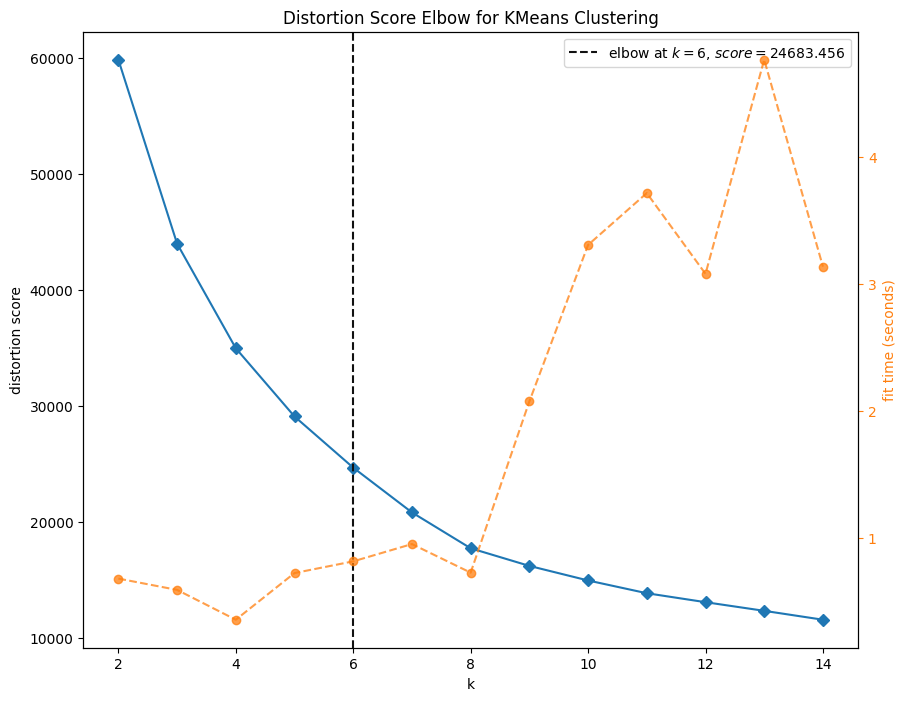

In [ ]:
plt.style.use('default')
plt.figure(figsize = (10,8))
from yellowbrick.cluster import KElbowVisualizer
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2,15))
visualizer.fit(x_scaled)
visualizer.show()
plt.show()


In [ ]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# from sklearn.cluster import KMeans
# from sklearn.preprocessing import StandardScaler
# # Initialize the KMeans model and fit it to the scaled dataset
# kmeans = KMeans(init='k-means++', n_init=10, random_state=42)
# kmeans.fit(x_scaled)

# # Calculate the sum of squared distances for each number of clusters
# sse = []
# for k in range(1, 15):
#     kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42)
#     kmeans.fit(x_scaled)
#     sse.append(kmeans.inertia_)

# # Plot the elbow graph
# plt.plot(range(1, 15), sse, marker='o')
# plt.xlabel('Number of clusters')
# plt.ylabel('Sum of squared distances')
# plt.title('Elbow Method')
# plt.show()



In [ ]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [ ]:
kmeans_scaled = KMeans(6)
kmeans_scaled.fit(x_scaled)


KMeans(n_clusters=6)

In [ ]:
kmeans = kmeans_scaled.fit(x_scaled)
labels_kmeans = kmeans.predict(x_scaled)



[0 2 0 ... 0 0 0]
 Our cluster centers are as follows
[[-0.34222944 -0.37248919 -0.52028439]
 [ 4.0583383   1.90861038 -0.24592546]
 [ 0.16944203  3.36944834 -0.674029  ]
 [-0.34093019 -0.38568864  0.736532  ]
 [ 0.81823529  0.67041268  0.20053284]
 [-0.23980932 -0.08441224 -2.08204985]]


,Monetory,Frequency,Recency
cluster_pred,,,
0,8247,8247,8247
1,1088,1088,1088
2,1056,1056,1056
3,13057,13057,13057
4,3995,3995,3995
5,2469,2469,2469


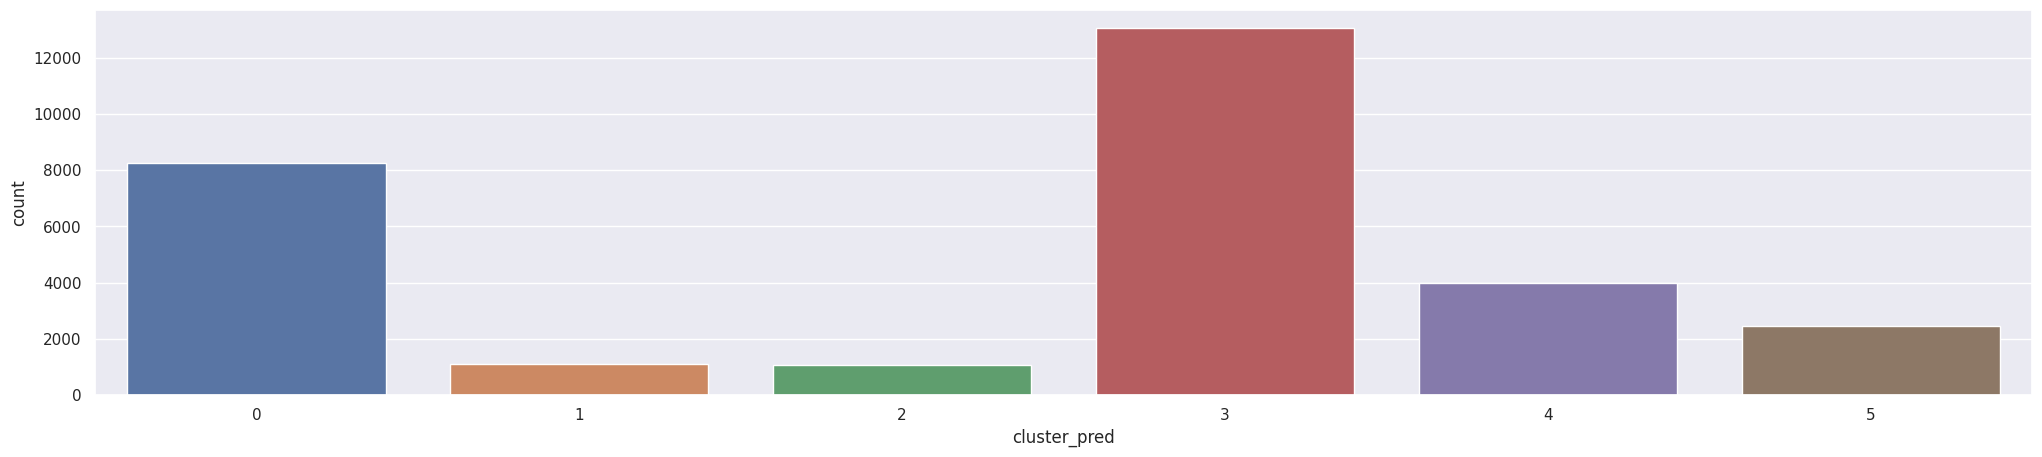

In [ ]:
identified_clusters = kmeans_scaled.fit_predict(rfm_df)
clusters_scaled = rfm_df.copy()
clusters_scaled['cluster_pred']=kmeans_scaled.fit_predict(x_scaled)
print(identified_clusters)
sns.set(style="darkgrid")
print(" Our cluster centers are as follows")
print(kmeans_scaled.cluster_centers_)
f, ax = plt.subplots(figsize=(25, 5))
ax = sns.countplot(x="cluster_pred", data=clusters_scaled)
clusters_scaled.groupby(['cluster_pred']).count()

In [ ]:
clusters_scaled.head()

,Monetory,Frequency,Recency,cluster_pred
1,415.1,6,36,5
2,47222.4,5,263,1
3,126.0,1,281,0
4,104.0,1,417,3
7,439.8,1,385,3


Text(0.5, 0, 'Monetory')

<Figure size 640x480 with 0 Axes>

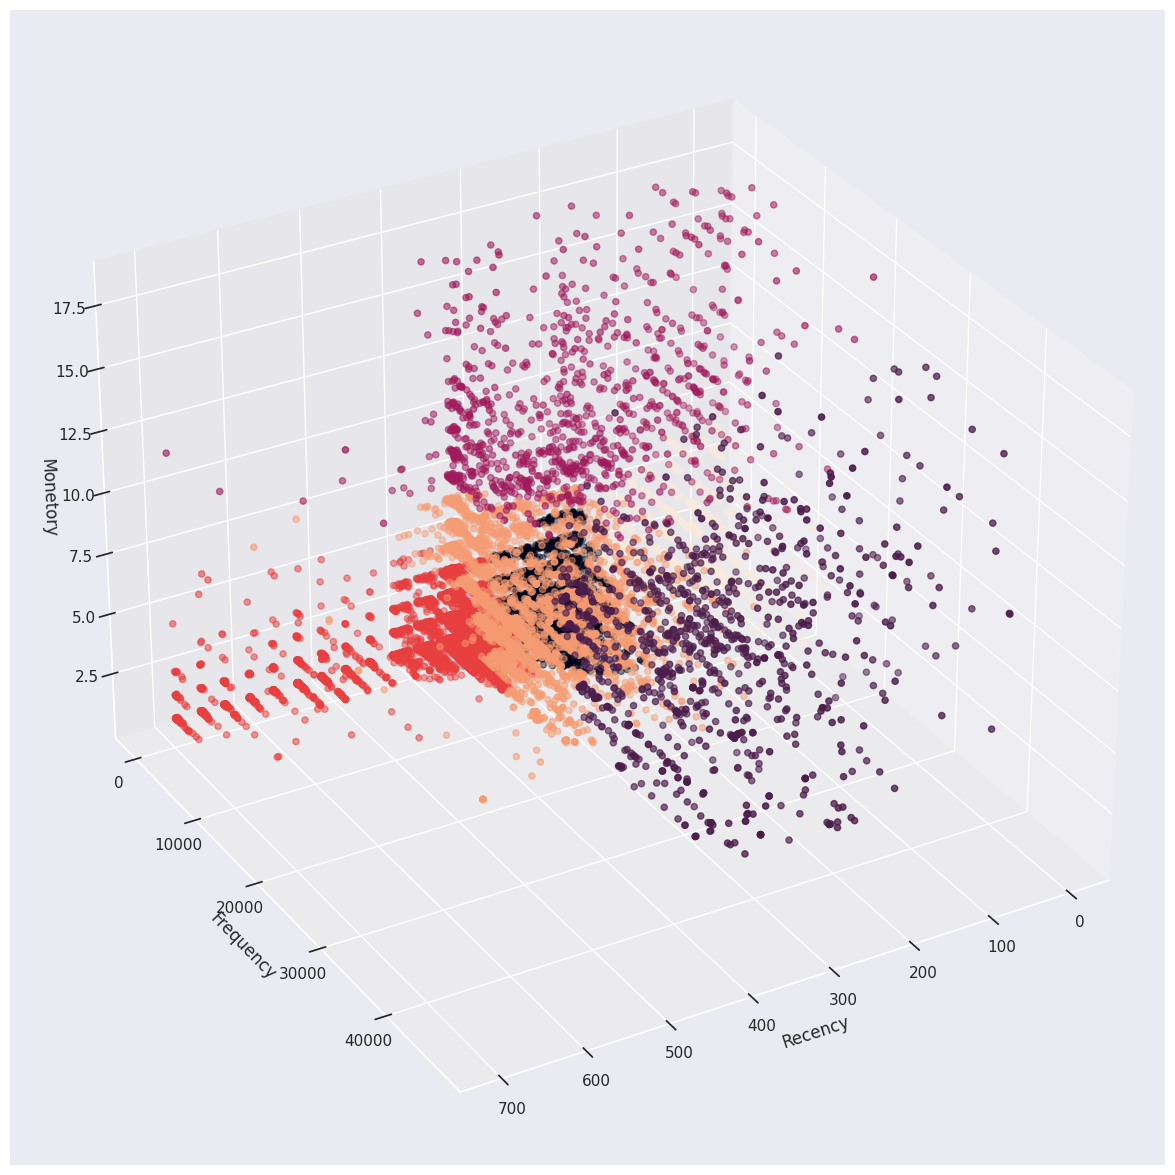

In [ ]:
fig = plt.figure()
plt.figure(figsize=(20,15))
ax = plt.axes(projection='3d')
xline=clusters_scaled['Recency']
yline=clusters_scaled['Frequency']
zline=clusters_scaled['Monetory']
ax.scatter3D(xline, zline,yline,c=clusters_scaled['cluster_pred'])
ax.view_init(30, 60)
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetory')


In [ ]:
rfm_dff = rfm_df.copy()
rfm_dff['cluster']= clusters_scaled['cluster_pred']


rfm_dff.groupby('cluster').agg({
    'Recency' : ['mean','min','max'],
    'Frequency' : ['mean','min','max'],
    'Monetory' : ['mean','min','max','count']
})

Recency            Frequency              Monetory           \
               mean  min  max       mean min max          mean      min   
cluster                                                                   
0        236.901661  153  298   1.546866   1   5   1058.651868      0.0   
1        265.534007    3  362   6.900735   1  18  28303.136015  15867.2   
2        220.916667    3  698  10.329545   7  18   4225.926558    161.7   
3        367.924025  304  698   1.515968   1   7   1066.394427      0.0   
4        312.044806   93  638   3.994743   1   9   8245.326891    150.0   
5         74.036047    0  187   2.223167   1   7   1691.090936      0.0   

                           
               max  count  
cluster                    
0        10999.800   8247  
1        47438.727   1088  
2        22835.310   1056  
3        11752.400  13057  
4        22299.600   3995  
5        20954.800   2469

In [ ]:
rfm_dff.groupby(['cluster']).size()

cluster
0     8247
1     1088
2     1056
3    13057
4     3995
5     2469
dtype: int64

In [ ]:
rfm_dff.head()

,Monetory,Frequency,Recency,cluster
1,415.1,6,36,5
2,47222.4,5,263,1
3,126.0,1,281,0
4,104.0,1,417,3
7,439.8,1,385,3


In [ ]:
rfm_df_KmeanClusters = rfm_dff.copy()

In [ ]:
kmean_df=rfm.copy()

In [ ]:
kmean_df['cluster_pred']=kmeans_scaled.fit_predict(x_scaled)

In [ ]:
kmean_df.head()

,Customer_Id,Monetory,Frequency,Recency,cluster_pred
1,15,415.1,6,36,4
2,20,47222.4,5,263,3
3,21,126.0,1,281,0
4,28,104.0,1,417,5
7,41,439.8,1,385,5


#### Predicted cluster with whole dataset

In [ ]:

merged_kmean_df = pd.merge(kmean_df, df_completed, on="Customer_Id")
merged_kmean_df.head()

,Customer_Id,Monetory,Frequency,Recency,cluster_pred,Order_Id,Order_Date,Status,Item_Id,SKU,Quantity_Ordered,Price,Value,Discount_Amount,Total,Category,Payment_Method,By_St,Year,Month,Ref_Number,Name_Prefix,First_Name,Middle_Initial,Last_Name,Gender,Age,Full_Name,Email,Signed_Date,Phone_Number,Place_Name,County,City,State,Zip_Code,Region,User_Name,Discount_Percent,Is_Discount
0,15,415.1,6,36,4,100356168,2020-08-10,complete,577573,BE_INDUCTIVE RAINBOW GLASS-2,3,18.5,55.5,0.0,55.5,Home & Living,cod,Net,2020,Oct-20,502271,Ms.,Debbie,P,Diebold,F,69,"Diebold, Debbie",debbie.diebold@bp.com,2010-12-31,219-549-4320,Schererville,Lake,Schererville,IN,46375,Midwest,dpdiebold,0.0,False
1,15,415.1,6,36,4,100356168,2020-08-10,complete,577574,HALGFE59AC99FA4FA4F,2,42.5,85.0,0.0,85.0,Home & Living,cod,Net,2020,Oct-20,502271,Ms.,Debbie,P,Diebold,F,69,"Diebold, Debbie",debbie.diebold@bp.com,2010-12-31,219-549-4320,Schererville,Lake,Schererville,IN,46375,Midwest,dpdiebold,0.0,False
2,15,415.1,6,36,4,100363192,2020-07-11,complete,588855,KABPLA59AC83A409698,2,57.4,114.8,0.0,114.8,Kids & Baby,cod,Net,2020,Nov-20,502271,Ms.,Debbie,P,Diebold,F,69,"Diebold, Debbie",debbie.diebold@bp.com,2010-12-31,219-549-4320,Schererville,Lake,Schererville,IN,46375,Midwest,dpdiebold,0.0,False
3,15,415.1,6,36,4,100444439,2021-11-02,complete,728631,MEFDIR5A1FE3919ABEC,2,9.9,19.8,0.0,19.8,Men's Fashion,cod,Net,2021,Feb-21,502271,Ms.,Debbie,P,Diebold,F,69,"Diebold, Debbie",debbie.diebold@bp.com,2010-12-31,219-549-4320,Schererville,Lake,Schererville,IN,46375,Midwest,dpdiebold,0.0,False
4,15,415.1,6,36,4,100444439,2021-11-02,complete,728632,MEFDYN5A00297625150-10,2,35.0,70.0,0.0,70.0,Men's Fashion,cod,Net,2021,Feb-21,502271,Ms.,Debbie,P,Diebold,F,69,"Diebold, Debbie",debbie.diebold@bp.com,2010-12-31,219-549-4320,Schererville,Lake,Schererville,IN,46375,Midwest,dpdiebold,0.0,False


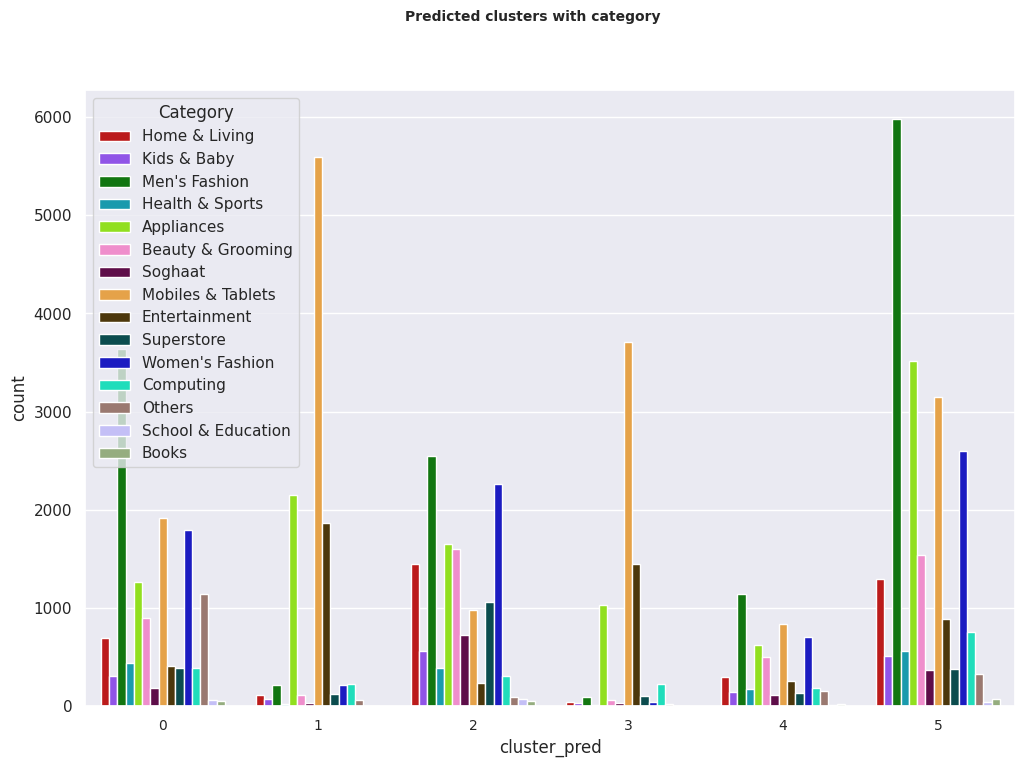

In [ ]:
#category
import colorcet as cc
plt.figure(figsize = (12,8))
custom_palette = sns.color_palette(cc.glasbey, n_colors=25)
sns.countplot(x=merged_kmean_df['cluster_pred'],hue=merged_kmean_df['Category'],palette=custom_palette)

plt.xticks(fontsize=10)
#Title 
plt.suptitle('Predicted clusters with category ', fontsize=10,fontweight="bold")
plt.show()

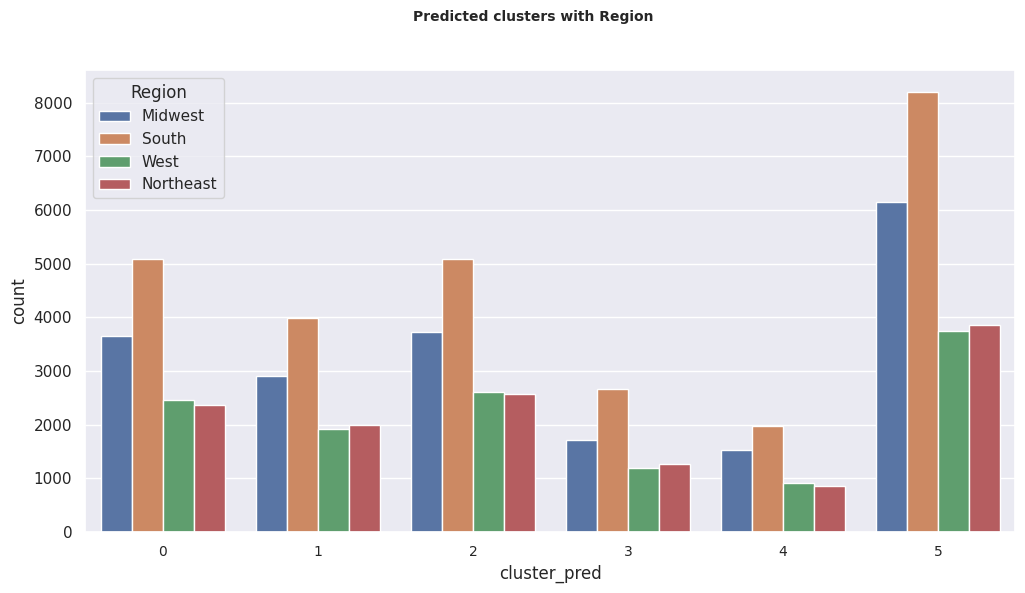

In [ ]:
#Region
plt.figure(figsize = (12,6))
sns.countplot(x=merged_kmean_df['cluster_pred'],hue=merged_kmean_df['Region'])
plt.xticks(fontsize=10)
#Title 
plt.suptitle('Predicted clusters with Region ', fontsize=10,fontweight="bold")
plt.show()

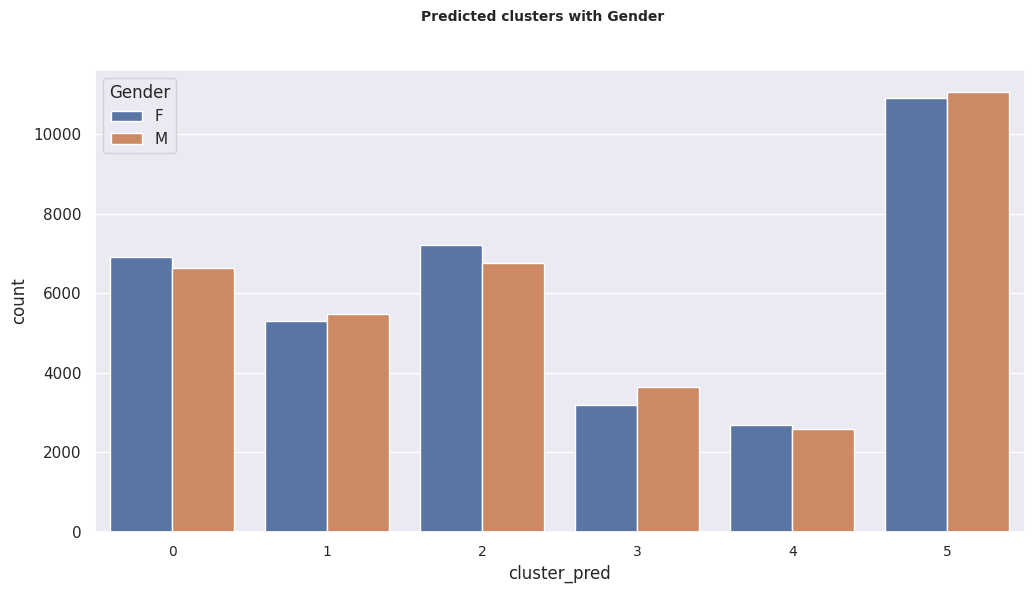

In [ ]:
#Gender
plt.figure(figsize = (12,6))
sns.countplot(x=merged_kmean_df['cluster_pred'],hue=merged_kmean_df['Gender'])
plt.xticks(fontsize=10)
#Title 
plt.suptitle('Predicted clusters with Gender ', fontsize=10,fontweight="bold")
plt.show()

<Axes: xlabel='Metric', ylabel='Value'>

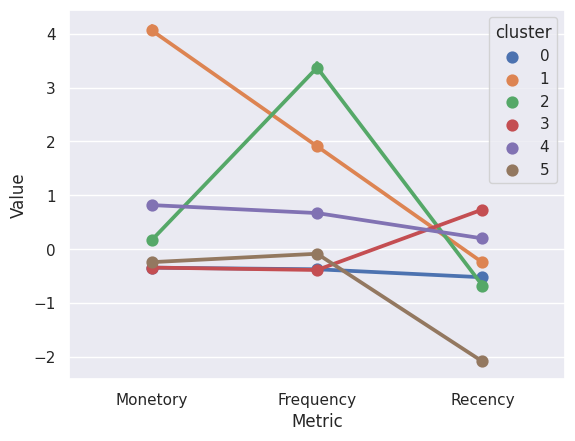

In [ ]:
#Snake-plot curve for the 6 clusters

df  = rfm_df_KmeanClusters[['Monetory','Frequency','Recency']]
normalized_df=(df-df.mean())/df.std()
normalized_df['cluster'] = rfm_df_KmeanClusters['cluster']
normalized_df.head()


df_melt = pd.melt(normalized_df.reset_index(), 
                        id_vars=['cluster'],
                        value_vars=['Monetory','Frequency','Recency'], 
                        var_name='Metric', 
                        value_name='Value')

plt.xlabel('Metric')
plt.ylabel('Value')
#point-plot
sns.pointplot(data=df_melt, x='Metric', y='Value', hue='cluster')

# **AGGLOMERATIVE CLUSTERING**

In [ ]:
rfm_df.tail()

,Monetory,Frequency,Recency
30551,962.8,6,108
30552,383.4,3,106
30553,360.0,3,101
30554,445.4,7,99
30555,199.8,5,302


In [ ]:
rfm_df.head()

,Monetory,Frequency,Recency
1,415.1,6,36
2,47222.4,5,263
3,126.0,1,281
4,104.0,1,417
7,439.8,1,385


In [ ]:
# import numpy as np
# from sklearn.cluster import AgglomerativeClustering
# from sklearn.metrics import silhouette_score
# import matplotlib.pyplot as plt
# from scipy.cluster.hierarchy import dendrogram



# # Define range of clusters to test
# n_clusters_range = range(2, 11)

# # Create an empty list to store the silhouette scores for each cluster
# silhouette_scores = []

# # Loop over the range of clusters to test
# for n_clusters in n_clusters_range:
#     # Initialize the agglomerative clustering model
#     model = AgglomerativeClustering(n_clusters=n_clusters)
#     # Fit the model to the data
#     model.fit(rfm_df)
#     # Calculate the silhouette score for the clustering solution
#     score = silhouette_score(rfm_df, model.labels_)
#     # Append the score to the list of silhouette scores
#     silhouette_scores.append(score)

# # Plot the silhouette scores as a function of the number of clusters
# plt.plot(n_clusters_range, silhouette_scores)
# plt.xlabel('Number of Clusters')
# plt.ylabel('Silhouette Score')
# plt.show()

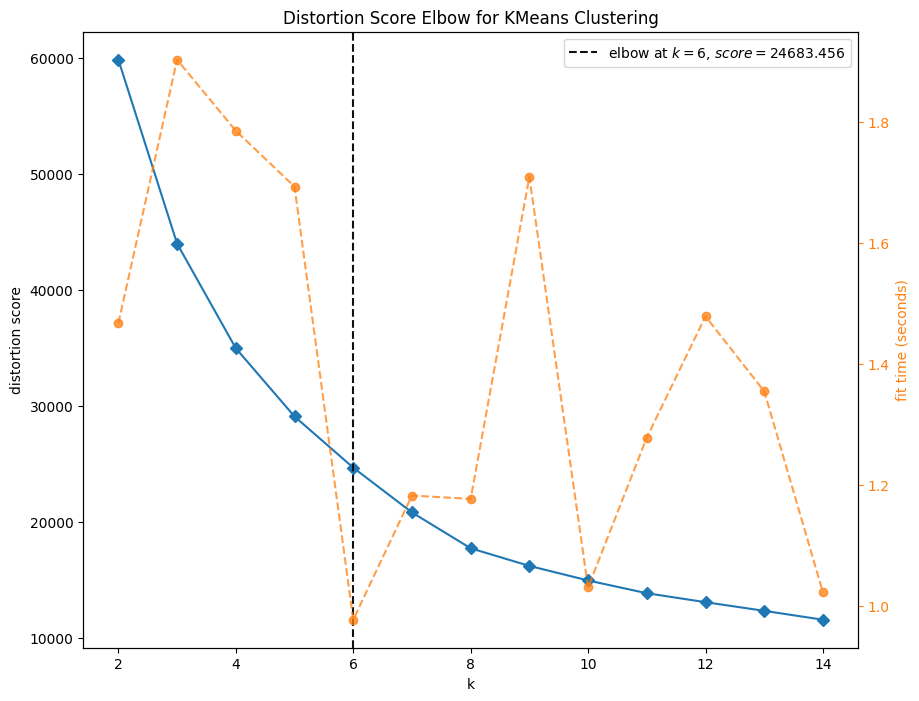

In [ ]:
plt.style.use('default')
plt.figure(figsize = (10,8))
visualizer = KElbowVisualizer(model, k=(2,15))
visualizer.fit(x_scaled)
visualizer.show()
plt.show()

In [ ]:
# building agglomerative clustering model
from sklearn.cluster import AgglomerativeClustering
agglo = AgglomerativeClustering(n_clusters=6, compute_distances=True).fit(rfm_df[['Recency','Frequency','Monetory']])

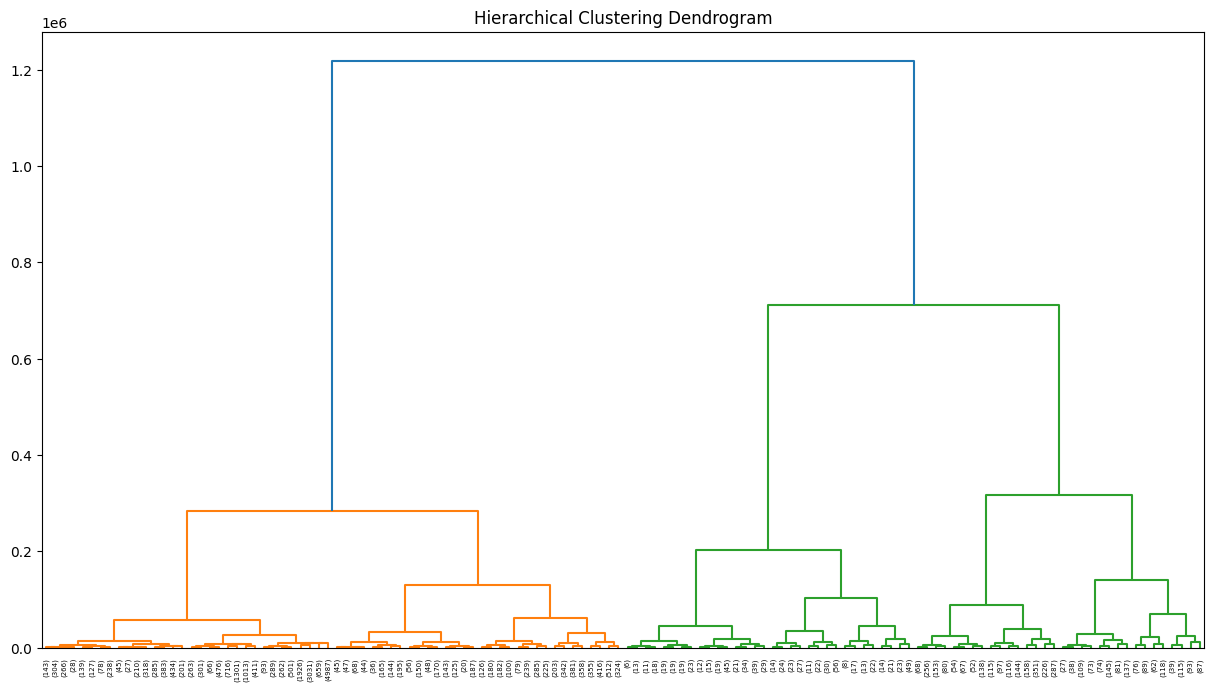

In [ ]:
# importing dendrogram
from scipy.cluster.hierarchy import dendrogram
def plot_dendrogram(agglo, **kwargs):
  counts = np.zeros(agglo.children_.shape[0])
  n_samples = len(agglo.labels_)
  for i, merge in enumerate(agglo.children_):
    current_count = 0
    for child_idx in merge:
      if child_idx < n_samples:
        current_count += 1
      else:
        current_count += counts[child_idx - n_samples]
      counts[i] = current_count
  linkage_matrix = np.column_stack([agglo.children_, agglo.distances_,counts]).astype(float)
  dendrogram(linkage_matrix, **kwargs)
plt.figure(figsize=(15,8))
plt.title('Hierarchical Clustering Dendrogram')
plot_dendrogram(agglo, truncate_mode='level', p=6)
plt.show()


In [ ]:
# # Create a dendrogram to visualize the clustering solution
# from scipy.cluster import hierarchy
# from scipy.cluster.hierarchy import dendrogram
# model2= AgglomerativeClustering(n_clusters=6)
# model2.fit(rfm_df)

# # Creating Dendrogram for our data
# # Z = linkage matrix
# Z = hierarchy.linkage(rfm_df, method='average')
  
# plt.figure(figsize=(20,15))
# plt.title("Dendrograms")
  
# # Dendrogram plotting using linkage matrix
# dendrogram = hierarchy.dendrogram(Z)


# # dendrogram = dendrogram(model2)
# # plt.show()

**ward method**

In [ ]:
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN
# apply agglomerative algorithm
agglo_model = AgglomerativeClustering(linkage="ward",n_clusters=6)
agglomerative_clusters = agglo_model.fit_predict(x_scaled)
agglomerative_clusters

array([5, 4, 2, ..., 5, 1, 0])

In [ ]:

labels_agglo = agglo_model.fit_predict(x_scaled)

In [ ]:
rfm_df_AggClusters= rfm_df.copy()

In [ ]:
rfm_df_AggClusters["agglomerative_clusters"] = agglomerative_clusters

In [ ]:
rfm_df_AggClusters.head()

,Monetory,Frequency,Recency,agglomerative_clusters
1,415.1,6,36,5
2,47222.4,5,263,4
3,126.0,1,281,2
4,104.0,1,417,0
7,439.8,1,385,0


Text(0.5, 0, 'Monetory')

<Figure size 640x480 with 0 Axes>

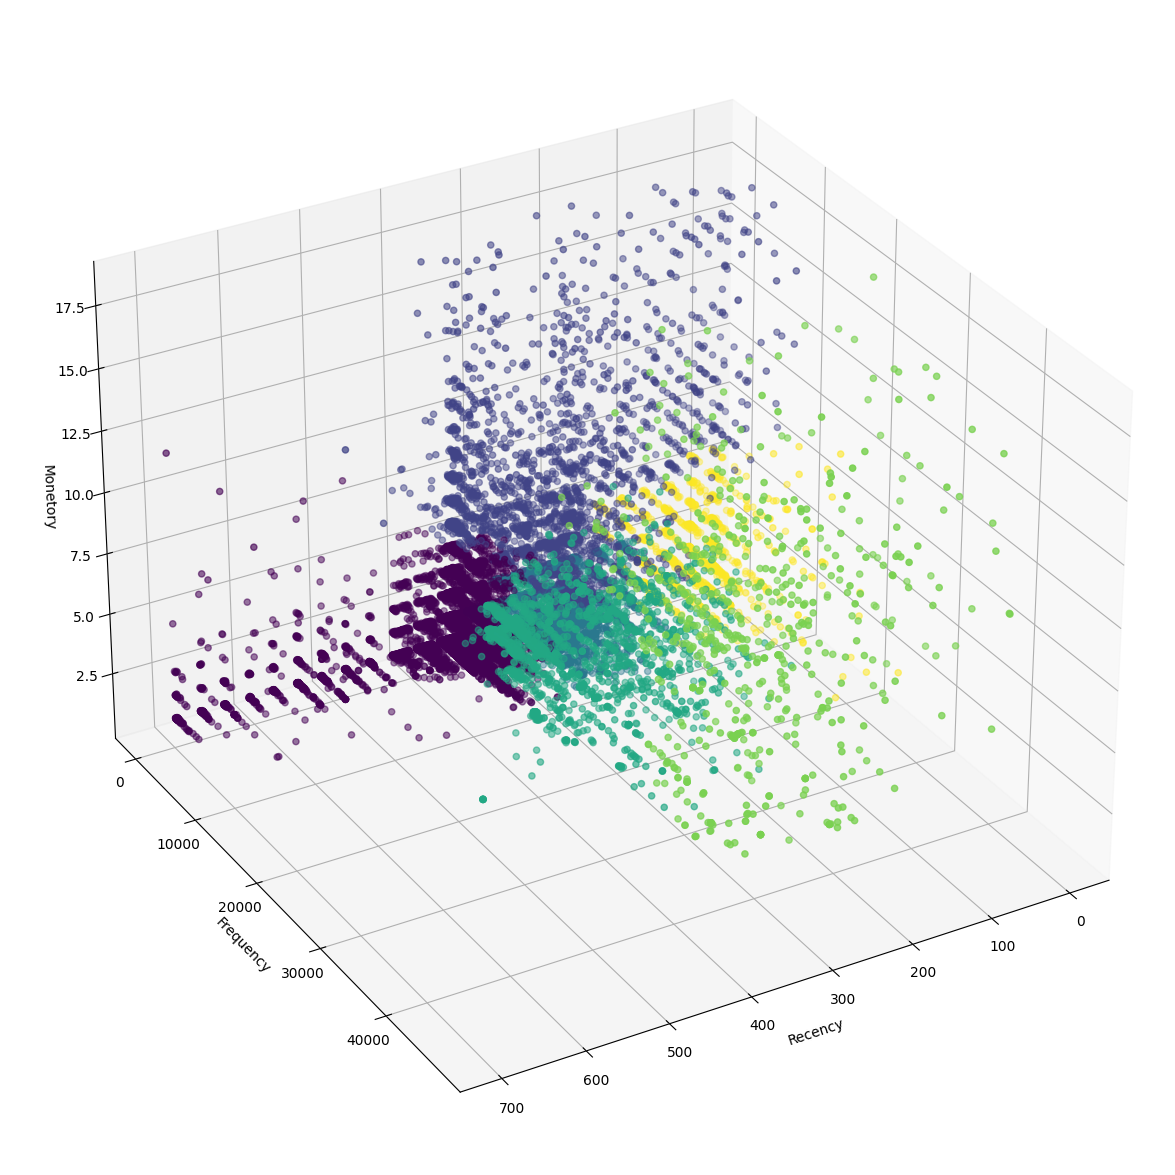

In [ ]:
fig = plt.figure()
plt.figure(figsize=(20,15))
ax = plt.axes(projection='3d')
xline=rfm_df_AggClusters['Recency']
yline=rfm_df_AggClusters['Frequency']
zline=rfm_df_AggClusters['Monetory']

ax.scatter3D(xline, zline,yline,c=rfm_df_AggClusters['agglomerative_clusters'])
ax.view_init(30, 60)

ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetory')


Text(0.5, 0, 'Monetory')

<Figure size 640x480 with 0 Axes>

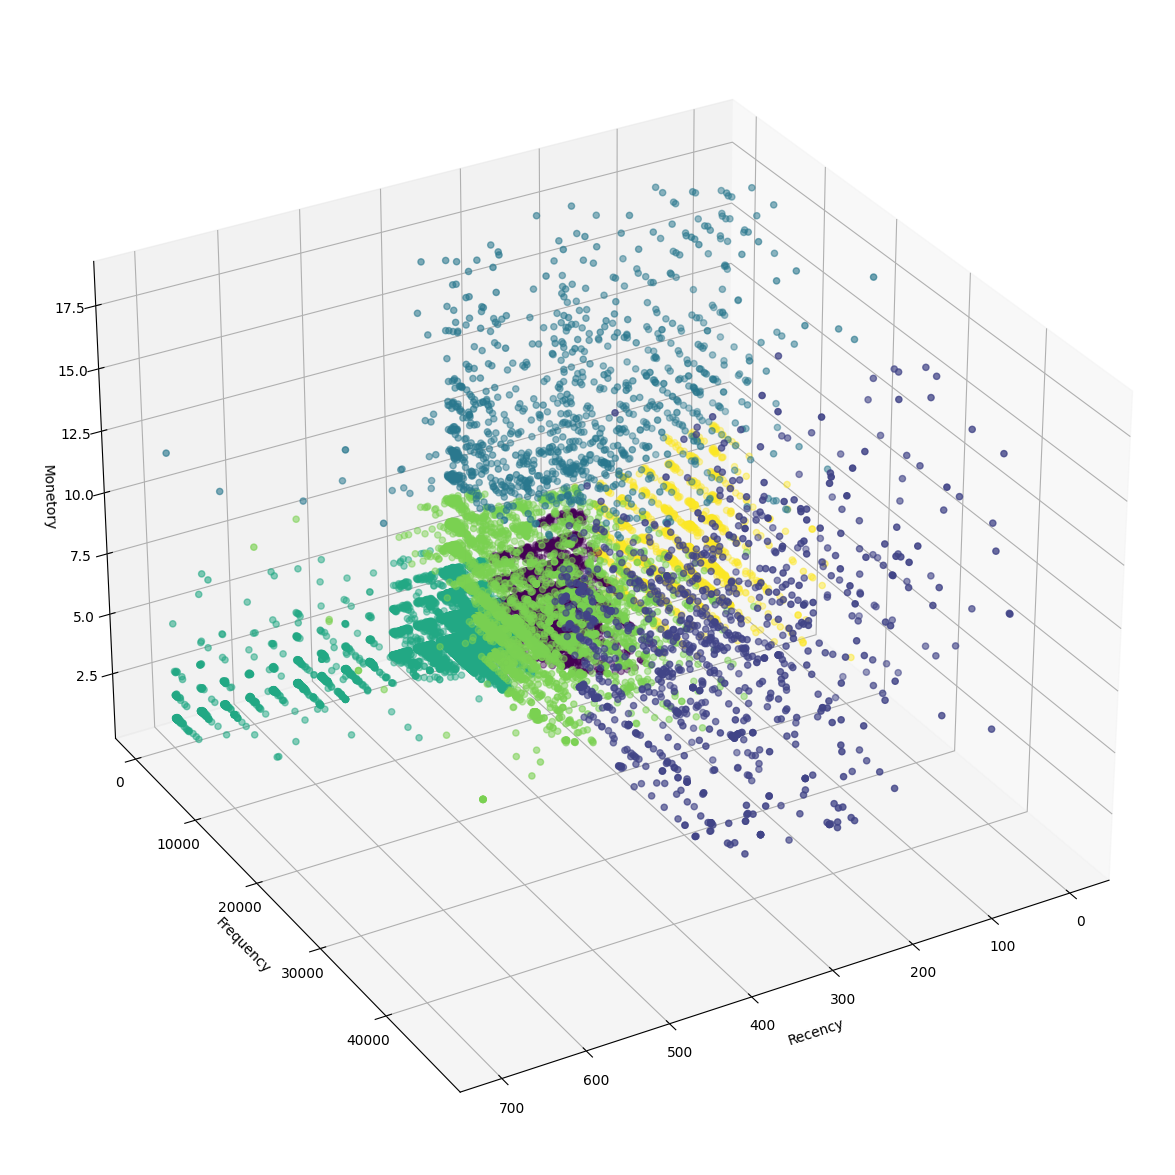

In [ ]:
fig = plt.figure()
plt.figure(figsize=(20,15))
ax = plt.axes(projection='3d')
xline=clusters_scaled['Recency']
yline=clusters_scaled['Frequency']
zline=clusters_scaled['Monetory']
ax.scatter3D(xline, zline,yline,c=clusters_scaled['cluster_pred'])
ax.view_init(30, 60)
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetory')

#### Prdeicted clusters with df

In [ ]:
Agglo_df=rfm.copy()

In [ ]:
Agglo_df['cluster_pred']=agglomerative_clusters
merged_agglo_df = pd.merge(Agglo_df, df_completed, on="Customer_Id")
merged_agglo_df.head()

,Customer_Id,Monetory,Frequency,Recency,cluster_pred,Order_Id,Order_Date,Status,Item_Id,SKU,Quantity_Ordered,Price,Value,Discount_Amount,Total,Category,Payment_Method,By_St,Year,Month,Ref_Number,Name_Prefix,First_Name,Middle_Initial,Last_Name,Gender,Age,Full_Name,Email,Signed_Date,Phone_Number,Place_Name,County,City,State,Zip_Code,Region,User_Name,Discount_Percent,Is_Discount
0,15,415.1,6,36,5,100356168,2020-08-10,complete,577573,BE_INDUCTIVE RAINBOW GLASS-2,3,18.5,55.5,0.0,55.5,Home & Living,cod,Net,2020,Oct-20,502271,Ms.,Debbie,P,Diebold,F,69,"Diebold, Debbie",debbie.diebold@bp.com,2010-12-31,219-549-4320,Schererville,Lake,Schererville,IN,46375,Midwest,dpdiebold,0.0,False
1,15,415.1,6,36,5,100356168,2020-08-10,complete,577574,HALGFE59AC99FA4FA4F,2,42.5,85.0,0.0,85.0,Home & Living,cod,Net,2020,Oct-20,502271,Ms.,Debbie,P,Diebold,F,69,"Diebold, Debbie",debbie.diebold@bp.com,2010-12-31,219-549-4320,Schererville,Lake,Schererville,IN,46375,Midwest,dpdiebold,0.0,False
2,15,415.1,6,36,5,100363192,2020-07-11,complete,588855,KABPLA59AC83A409698,2,57.4,114.8,0.0,114.8,Kids & Baby,cod,Net,2020,Nov-20,502271,Ms.,Debbie,P,Diebold,F,69,"Diebold, Debbie",debbie.diebold@bp.com,2010-12-31,219-549-4320,Schererville,Lake,Schererville,IN,46375,Midwest,dpdiebold,0.0,False
3,15,415.1,6,36,5,100444439,2021-11-02,complete,728631,MEFDIR5A1FE3919ABEC,2,9.9,19.8,0.0,19.8,Men's Fashion,cod,Net,2021,Feb-21,502271,Ms.,Debbie,P,Diebold,F,69,"Diebold, Debbie",debbie.diebold@bp.com,2010-12-31,219-549-4320,Schererville,Lake,Schererville,IN,46375,Midwest,dpdiebold,0.0,False
4,15,415.1,6,36,5,100444439,2021-11-02,complete,728632,MEFDYN5A00297625150-10,2,35.0,70.0,0.0,70.0,Men's Fashion,cod,Net,2021,Feb-21,502271,Ms.,Debbie,P,Diebold,F,69,"Diebold, Debbie",debbie.diebold@bp.com,2010-12-31,219-549-4320,Schererville,Lake,Schererville,IN,46375,Midwest,dpdiebold,0.0,False


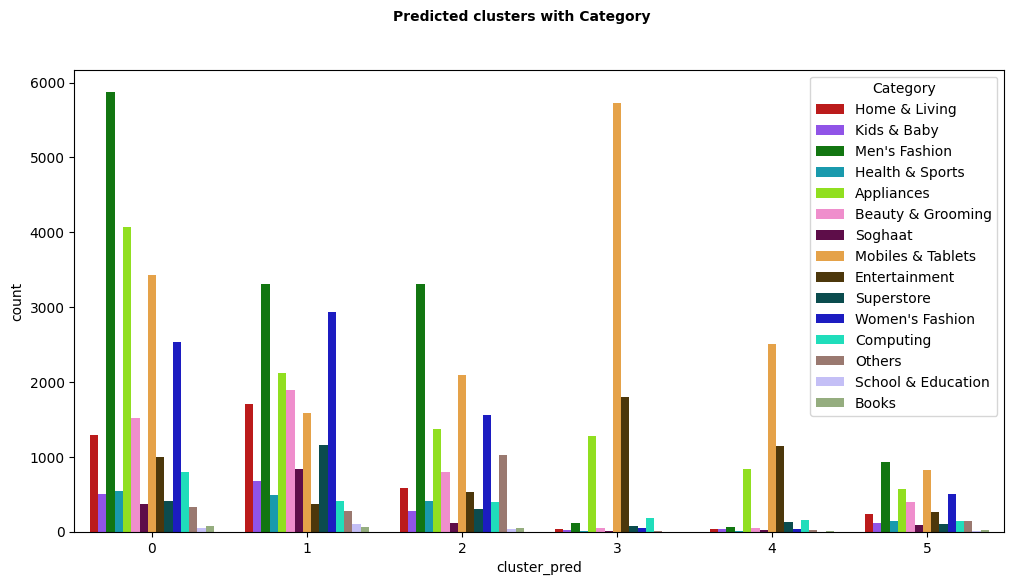

In [ ]:
#category
import colorcet as cc
plt.figure(figsize = (12,6))
custom_palette = sns.color_palette(cc.glasbey, n_colors=25)
sns.countplot(x=merged_agglo_df['cluster_pred'],order=merged_agglo_df['cluster_pred'].value_counts().index,hue=merged_agglo_df['Category'],palette=custom_palette)
plt.xticks(fontsize=10)
#Title 
plt.suptitle('Predicted clusters with Category ', fontsize=10,fontweight="bold")
plt.show()



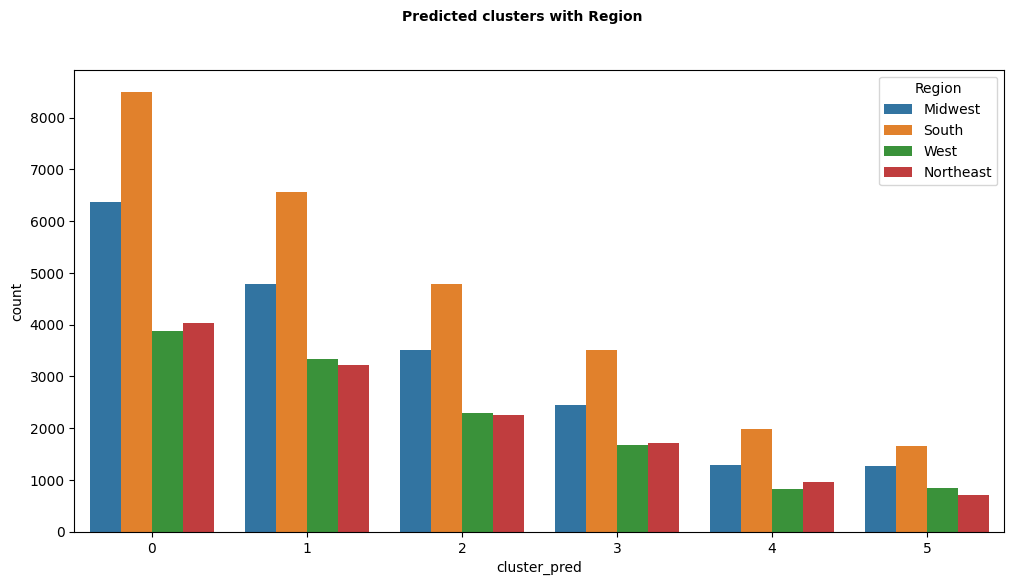

In [ ]:
#Region
plt.figure(figsize = (12,6))
sns.countplot(x=merged_agglo_df['cluster_pred'],order=merged_agglo_df['cluster_pred'].value_counts().index,hue=merged_agglo_df['Region'])
plt.xticks(fontsize=10)
#Title 
plt.suptitle('Predicted clusters with Region ', fontsize=10,fontweight="bold")
plt.show()

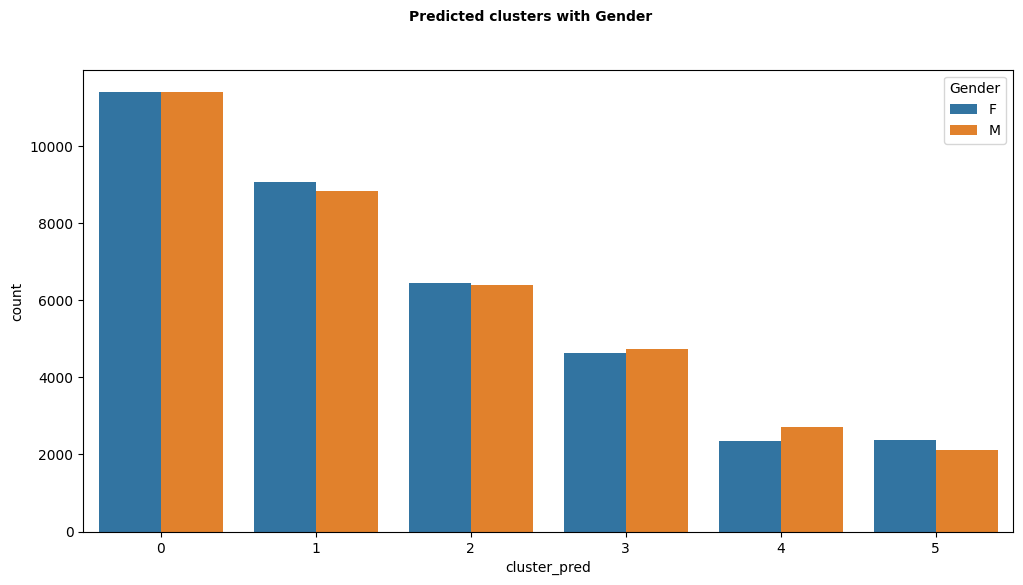

In [ ]:
#Gender
plt.figure(figsize = (12,6))
sns.countplot(x=merged_agglo_df['cluster_pred'],order=merged_agglo_df['cluster_pred'].value_counts().index,hue=merged_agglo_df['Gender'])
plt.xticks(fontsize=10)
#Title 
plt.suptitle('Predicted clusters with Gender ', fontsize=10,fontweight="bold")
plt.show()

In [ ]:
rfm_df_AggClusters.groupby('agglomerative_clusters').agg({
    'Recency' : ['mean','min','max'],
    'Frequency' : ['mean','min','max'],
    'Monetory' : ['mean','min','max','count']
})

Recency           Frequency              Monetory  \
                              mean  min  max      mean min max          mean   
agglomerative_clusters                                                         
0                       367.502119  277  698  1.665205   1  12   1299.065498   
1                       238.478574    3  577  7.172207   3  18   3182.902019   
2                       235.788981  114  329  1.463785   1   3   1324.509992   
3                       319.134131  125  484  3.996155   1  10  14316.670268   
4                       240.907131    3  353  8.361526   1  18  33038.839035   
5                        61.782953    0  160  2.222993   1  11   2106.019815   

                                                    
                             min        max  count  
agglomerative_clusters                              
0                           0.00  12464.000  13686  
1                           0.00  16343.750   2497  
2                           0.00  12214.600   8767  
3                        6228.83  32333.500   2341  
4                       16995.70  47438.727    603  
5                           0.00  27599.070   2018

<Axes: xlabel='Metric', ylabel='Value'>

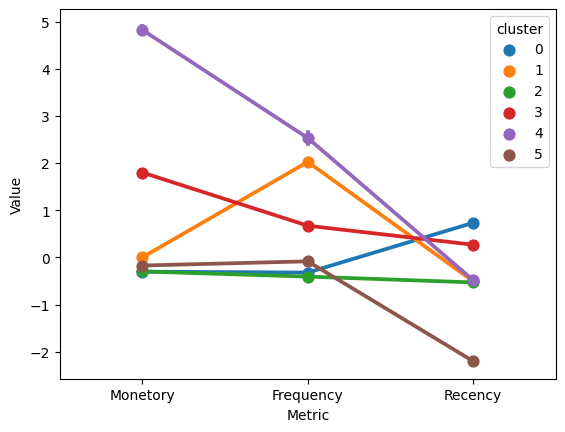

In [ ]:
#Snake-plot curve for the 4 clusters
df  = rfm_df_AggClusters[['Monetory','Frequency','Recency']]
normalized_df=(df-df.mean())/df.std()
normalized_df['cluster'] = rfm_df_AggClusters['agglomerative_clusters']
normalized_df.head()


df_melt = pd.melt(normalized_df.reset_index(), 
                        id_vars=['cluster'],
                        value_vars=['Monetory','Frequency','Recency'], 
                        var_name='Metric', 
                        value_name='Value')
plt.xlabel('Metric')
plt.ylabel('Value')
#point-plot
sns.pointplot(data=df_melt, x='Metric', y='Value', hue='cluster')

**complete linkage method**

# **Gaussian Mixture Model**

In [ ]:
rfm_df.head()

,Monetory,Frequency,Recency
1,415.1,6,36
2,47222.4,5,263
3,126.0,1,281
4,104.0,1,417
7,439.8,1,385


In [ ]:
from scipy.stats import shapiro
# Extract the RFM values into a numpy array
rfm_values = rfm_df[['Recency', 'Frequency', 'Monetory']].values

# Perform Shapiro-Wilk test on the RFM values
stat, p = shapiro(rfm_values)

# Print the results
print('Statistic=%.3f, p=%.3f' % (stat, p))
if stat < 1.96:
    print('The RFM data is likely Gaussian.')
else:
    print('The RFM data is likely not Gaussian.')

Statistic=0.308, p=0.000
The RFM data is likely Gaussian.


In [ ]:
rfm_df_gau = rfm_df.copy()

In [ ]:
# Apply Box-Cox transformation to the Monetary column
rfm_df_gau['Monetory'] = stats.zscore(rfm_df_gau['Monetory'])

rfm_df_gau['Frequency'] = stats.zscore(rfm_df_gau['Frequency'])
# Normalize the Recency column using z-score normalization
rfm_df_gau['Recency'] = stats.zscore(rfm_df_gau['Recency'])

# Print the first five rows of the transformed dataset
print(rfm_df_gau.head())

   Monetory  Frequency   Recency
1 -0.446074   1.524854 -2.448305
2  7.114135   1.098806 -0.270239
3 -0.492769  -0.605387 -0.097529
4 -0.496322  -0.605387  1.207391
7 -0.442085  -0.605387  0.900351


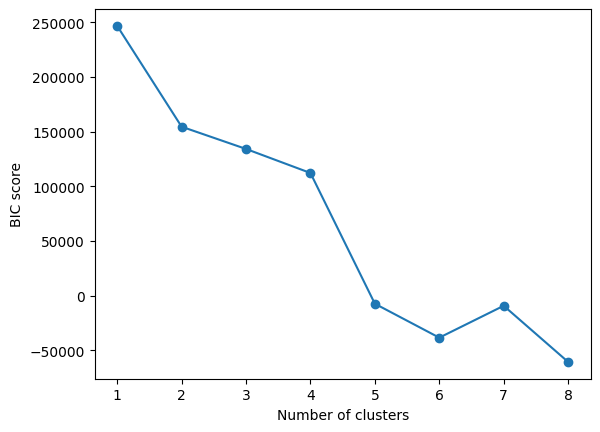

The optimal number of clusters is: 8


In [ ]:
import numpy as np
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt


# Fit GMM models with different numbers of components
n_components = np.arange(1, 9)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(rfm_df_gau) for n in n_components]

# Calculate BIC scores for each model
bic_scores = [model.bic(rfm_df_gau) for model in models]

# Plot the BIC scores
plt.plot(n_components, bic_scores, '-o')
plt.xlabel('Number of clusters')
plt.ylabel('BIC score')
plt.show()

# Choose the model with the lowest BIC score
best_n_components = n_components[np.argmin(bic_scores)]
print("The optimal number of clusters is:", best_n_components)

**Using RFM dataset without normalization**

In [ ]:
# Extract the RFM values into a numpy array
rfm_values = rfm_df[['Recency', 'Frequency', 'Monetory']].values

# Perform Shapiro-Wilk test on the RFM values
stat, p = shapiro(rfm_values)

# Print the results
print('Statistic=%.3f, p=%.3f' % (stat, p))
if stat < 1.96:
    print('The RFM data is likely Gaussian.')
else:
    print('The RFM data is likely not Gaussian.')

Statistic=0.308, p=0.000
The RFM data is likely Gaussian.


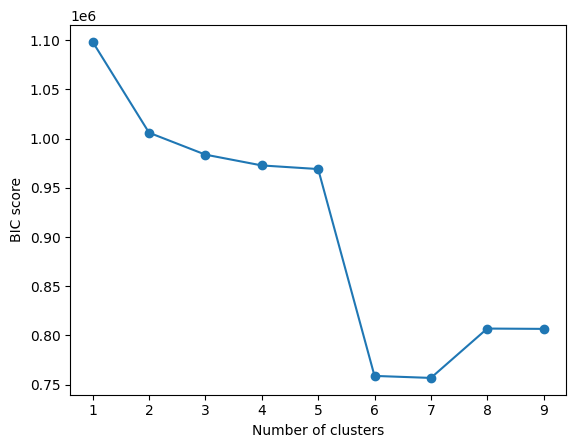

The optimal number of clusters is: 7


In [ ]:
import numpy as np
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt


# Fit GMM models with different numbers of components
n_components = np.arange(1, 10)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(rfm_df) for n in n_components]

# Calculate BIC scores for each model
bic_scores = [model.bic(rfm_df) for model in models]

# Plot the BIC scores
plt.plot(n_components, bic_scores, '-o')
plt.xlabel('Number of clusters')
plt.ylabel('BIC score')
plt.show()

# Choose the model with the lowest BIC score
best_n_components = n_components[np.argmin(bic_scores)]
print("The optimal number of clusters is:", best_n_components)


In [ ]:
rfm_df_GauClusters= rfm_df.copy()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture


# Fit the Gaussian mixture model
gmm = GaussianMixture(n_components=7, random_state=42)
gmm.fit(rfm_df_GauClusters)

# Predict the clusters
clusters = gmm.predict(rfm_df_GauClusters)

# Add the predicted clusters to the dataframe
rfm_df_GauClusters['GauCluster'] = clusters



In [ ]:
gmm = GaussianMixture(n_components=7).fit(x_scaled)
labels_gmm = gmm.predict(x_scaled)

In [ ]:
rfm_df_GauClusters.head()

,Monetory,Frequency,Recency,GauCluster
1,415.1,6,36,5
2,47222.4,5,263,4
3,126.0,1,281,2
4,104.0,1,417,2
7,439.8,1,385,2


<Figure size 640x480 with 0 Axes>

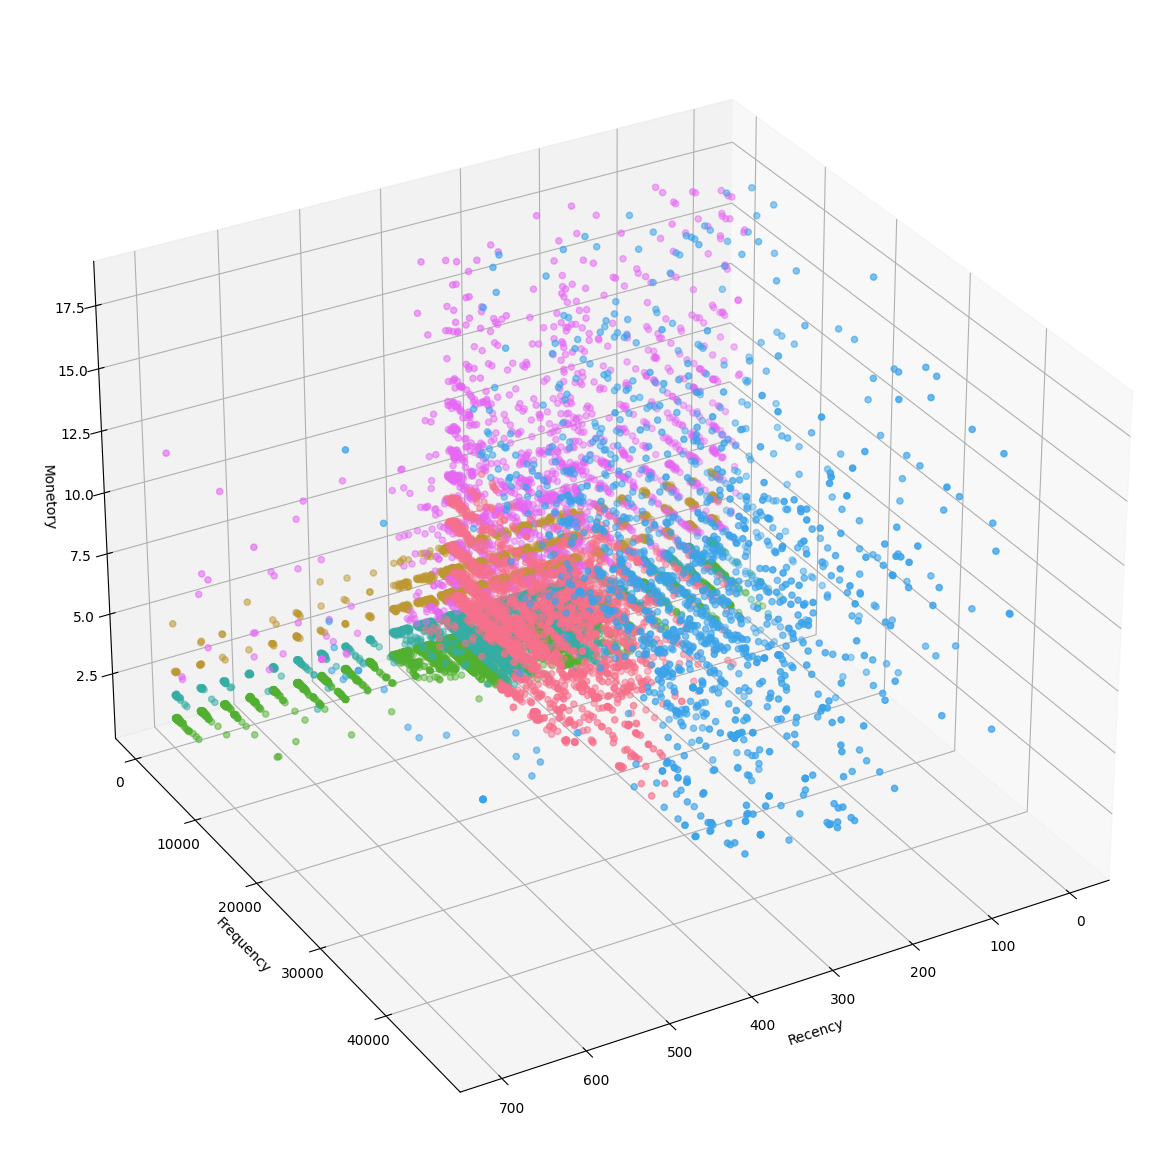

In [ ]:
from matplotlib.colors import ListedColormap
fig = plt.figure()
plt.figure(figsize=(25,15))
ax = plt.axes(projection='3d')
xline=clusters_scaled['Recency']
yline=clusters_scaled['Frequency']
zline=clusters_scaled['Monetory']
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetory')

# get colormap from seaborn
cmap = ListedColormap(sns.color_palette("husl", 256).as_hex())
ax.scatter3D(xline, zline,yline,c='GauCluster', data=rfm_df_GauClusters,cmap=cmap)
ax.view_init(30, 60)

In [ ]:
Gaussian_df=rfm.copy()

In [ ]:
Gaussian_df['cluster_pred']=clusters
merged_gaussian_df = pd.merge(Gaussian_df, df_completed, on="Customer_Id")
merged_gaussian_df.head()

,Customer_Id,Monetory,Frequency,Recency,cluster_pred,Order_Id,Order_Date,Status,Item_Id,SKU,Quantity_Ordered,Price,Value,Discount_Amount,Total,Category,Payment_Method,By_St,Year,Month,Ref_Number,Name_Prefix,First_Name,Middle_Initial,Last_Name,Gender,Age,Full_Name,Email,Signed_Date,Phone_Number,Place_Name,County,City,State,Zip_Code,Region,User_Name,Discount_Percent,Is_Discount
0,15,415.1,6,36,5,100356168,2020-08-10,complete,577573,BE_INDUCTIVE RAINBOW GLASS-2,3,18.5,55.5,0.0,55.5,Home & Living,cod,Net,2020,Oct-20,502271,Ms.,Debbie,P,Diebold,F,69,"Diebold, Debbie",debbie.diebold@bp.com,2010-12-31,219-549-4320,Schererville,Lake,Schererville,IN,46375,Midwest,dpdiebold,0.0,False
1,15,415.1,6,36,5,100356168,2020-08-10,complete,577574,HALGFE59AC99FA4FA4F,2,42.5,85.0,0.0,85.0,Home & Living,cod,Net,2020,Oct-20,502271,Ms.,Debbie,P,Diebold,F,69,"Diebold, Debbie",debbie.diebold@bp.com,2010-12-31,219-549-4320,Schererville,Lake,Schererville,IN,46375,Midwest,dpdiebold,0.0,False
2,15,415.1,6,36,5,100363192,2020-07-11,complete,588855,KABPLA59AC83A409698,2,57.4,114.8,0.0,114.8,Kids & Baby,cod,Net,2020,Nov-20,502271,Ms.,Debbie,P,Diebold,F,69,"Diebold, Debbie",debbie.diebold@bp.com,2010-12-31,219-549-4320,Schererville,Lake,Schererville,IN,46375,Midwest,dpdiebold,0.0,False
3,15,415.1,6,36,5,100444439,2021-11-02,complete,728631,MEFDIR5A1FE3919ABEC,2,9.9,19.8,0.0,19.8,Men's Fashion,cod,Net,2021,Feb-21,502271,Ms.,Debbie,P,Diebold,F,69,"Diebold, Debbie",debbie.diebold@bp.com,2010-12-31,219-549-4320,Schererville,Lake,Schererville,IN,46375,Midwest,dpdiebold,0.0,False
4,15,415.1,6,36,5,100444439,2021-11-02,complete,728632,MEFDYN5A00297625150-10,2,35.0,70.0,0.0,70.0,Men's Fashion,cod,Net,2021,Feb-21,502271,Ms.,Debbie,P,Diebold,F,69,"Diebold, Debbie",debbie.diebold@bp.com,2010-12-31,219-549-4320,Schererville,Lake,Schererville,IN,46375,Midwest,dpdiebold,0.0,False


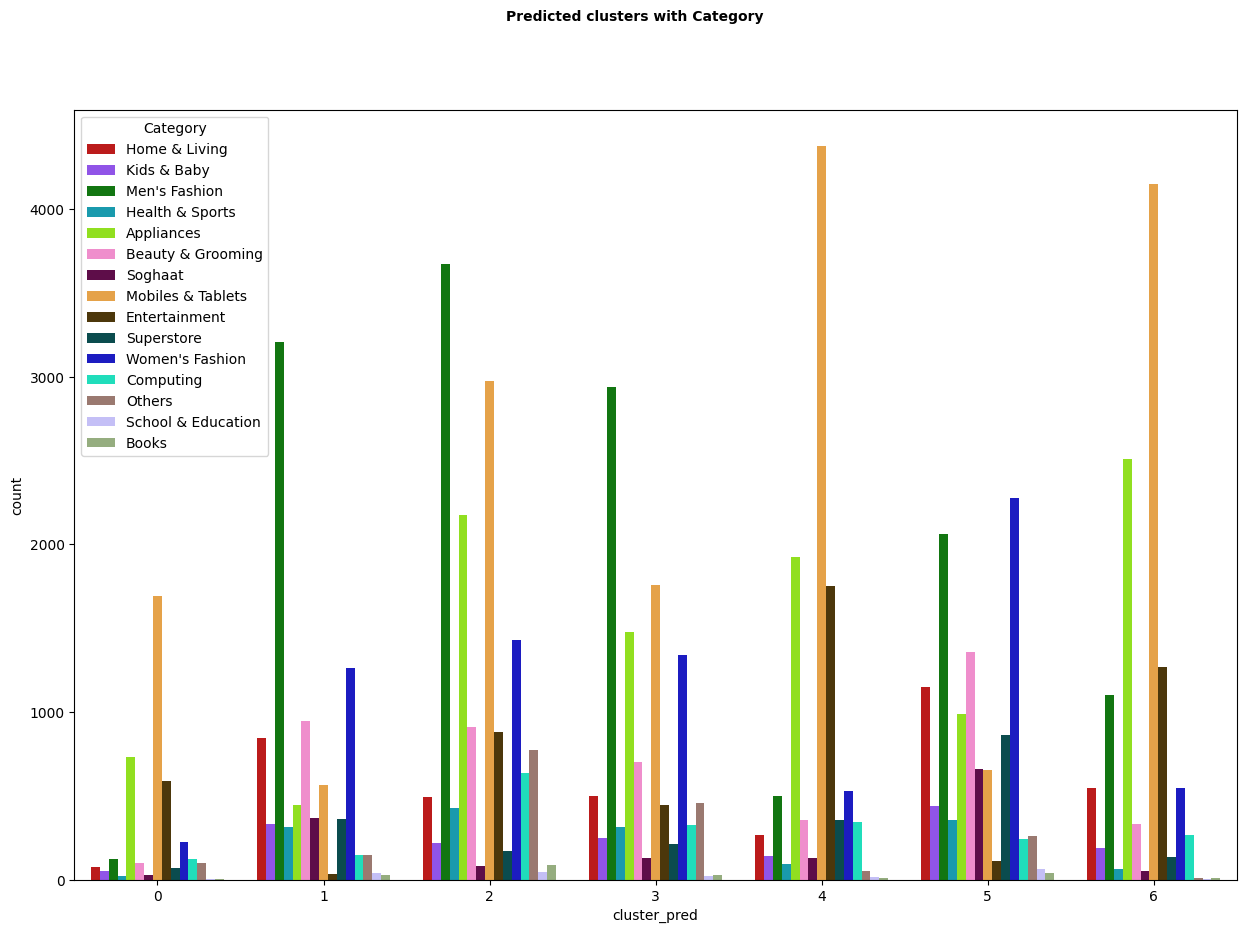

In [ ]:
#category
import colorcet as cc
plt.figure(figsize = (15,10))
custom_palette = sns.color_palette(cc.glasbey, n_colors=25)
sns.countplot(x=merged_gaussian_df['cluster_pred'],hue=merged_gaussian_df['Category'],palette=custom_palette)
plt.xticks(fontsize=10)
#Title 
plt.suptitle('Predicted clusters with Category ', fontsize=10,fontweight="bold")
plt.show()

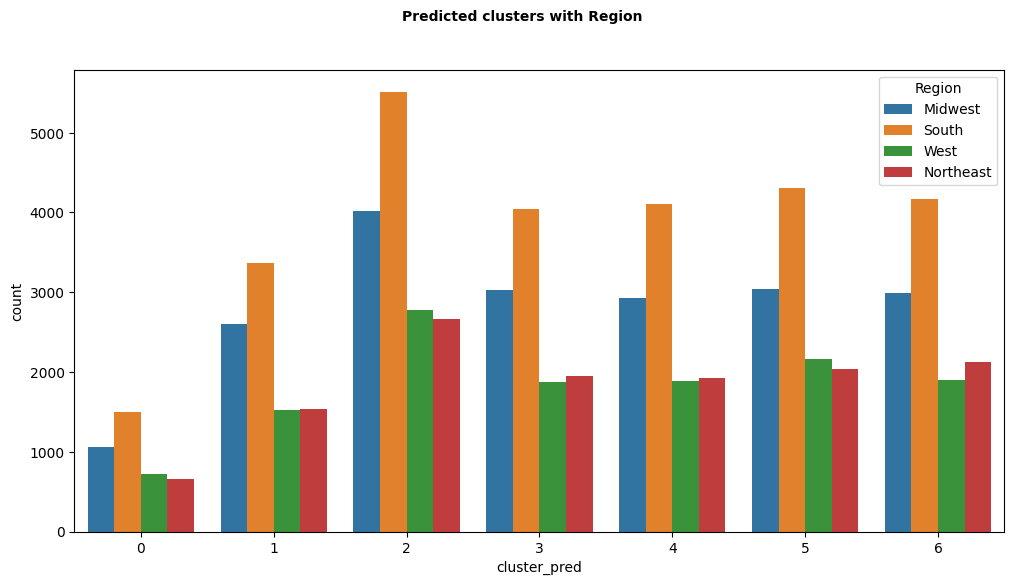

In [ ]:
#Region
plt.figure(figsize = (12,6))
sns.countplot(x=merged_gaussian_df['cluster_pred'],hue=merged_gaussian_df['Region'])
plt.xticks(fontsize=10)
#Title 
plt.suptitle('Predicted clusters with Region ', fontsize=10,fontweight="bold")
plt.show()

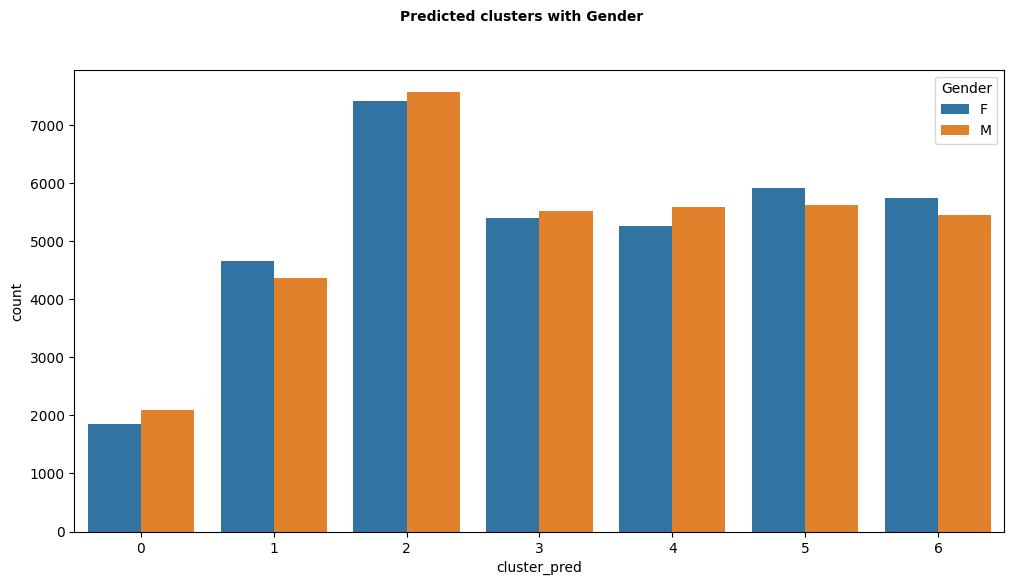

In [ ]:
#Gender
plt.figure(figsize = (12,6))
sns.countplot(x=merged_gaussian_df['cluster_pred'],hue=merged_gaussian_df['Gender'])
plt.xticks(fontsize=10)
#Title 
plt.suptitle('Predicted clusters with Gender ', fontsize=10,fontweight="bold")
plt.show()

In [ ]:
rfm_df_GauClusters.groupby('GauCluster').agg({
    'Recency' : ['mean','min','max'],
    'Frequency' : ['mean','min','max'],
    'Monetory' : ['mean','min','max','count']
})

Recency           Frequency              Monetory           \
                  mean  min  max      mean min max          mean      min   
GauCluster                                                                  
0           243.843034   93  417  3.470018   1   6   9345.612343  2548.97   
1           274.508731    0  698  3.505239   3   5    504.481434     0.00   
2           299.938318    2  698  1.000000   1   1   1015.967353     0.00   
3           292.013573    2  698  2.000000   2   2   1612.547106     0.00   
4           224.294535    3  577  7.694819   1  18  22733.960836  4865.10   
5           227.480854    3  698  7.242310   3  18   1853.995300   161.70   
6           347.613300  338  360  4.041923   1   9   8721.377919    73.00   

                              
                  max  count  
GauCluster                    
0           19664.400   1134  
1            1313.600   2577  
2            9059.800  14980  
3           12511.800   5452  
4           47438.727   1409  
5            6063.380   1593  
6           32387.400   2767

<Axes: xlabel='Metric', ylabel='Value'>

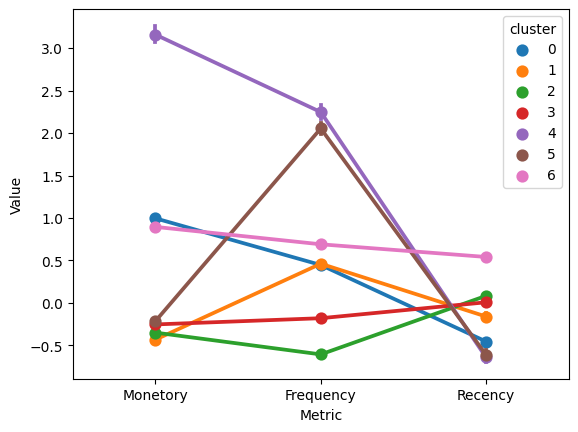

In [ ]:
#Snake-plot curve for the 4 clusters
df  = rfm_df_GauClusters[['Monetory','Frequency','Recency']]
normalized_df=(df-df.mean())/df.std()
normalized_df['cluster'] = rfm_df_GauClusters['GauCluster']
normalized_df.head()


df_melt = pd.melt(normalized_df.reset_index(), 
                        id_vars=['cluster'],
                        value_vars=['Monetory','Frequency','Recency'], 
                        var_name='Metric', 
                        value_name='Value')
plt.xlabel('Metric')
plt.ylabel('Value')
#point-plot
sns.pointplot(data=df_melt, x='Metric', y='Value', hue='cluster')

# **Silhouette Score For Each clustering techniques**

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score
def silhouette_method(df,algo,y_pred):
  print('=================================================================================')
  print('Clustering ',algo," : silhouette score : ",silhouette_score(df,y_pred) )


silhouette_method(x_scaled,' : KMeans',identified_clusters)
silhouette_method(x_scaled,' : Agglomerative',agglomerative_clusters)
silhouette_method(rfm_df_GauClusters,' : GaussianMixture',clusters)
print('=======================================================================')

Clustering   : KMeans  : silhouette score :  0.14461137076662298
Clustering   : Agglomerative  : silhouette score :  0.3683009299934663
Clustering   : GaussianMixture  : silhouette score :  -0.3795108011093722


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
%matplotlib inline
print(f'Silhouette Score(n=6): {silhouette_score(x_scaled, identified_clusters)}')

Silhouette Score(n=6): 0.14461137076662298


In [ ]:
print(f'Silhouette Score(n=6): {silhouette_score(x_scaled, identified_clusters)}')

Silhouette Score(n=6): 0.14461137076662298


In [ ]:
print(f'Silhouette Score(n=6): {silhouette_score(x_scaled, agglomerative_clusters)}')

Silhouette Score(n=6): 0.3683009299934663


In [ ]:
print(f'Silhouette Score(n=7): {silhouette_score(rfm_df_GauClusters, clusters)}')

Silhouette Score(n=7): -0.3795108011093722


# **Model Validation**

In [ ]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, adjusted_rand_score, normalized_mutual_info_score

silhouette_kmeans = silhouette_score(x_scaled, labels_kmeans)
silhouette_agglo = silhouette_score(x_scaled, labels_agglo)
silhouette_gmm = silhouette_score(x_scaled, labels_gmm)

In [ ]:
print("KMeans - Silhouette Score:", silhouette_kmeans)
print("Agglomerative Clustering - Silhouette Score:", silhouette_agglo)
print("GMM - Silhouette Score:", silhouette_gmm)

KMeans - Silhouette Score: 0.3933125871986843
Agglomerative Clustering - Silhouette Score: 0.3683009299934663
GMM - Silhouette Score: 0.11901770415761323
